## Resources

## Accepted data format
1. Audio file name should follow the structure '{genre}.00000.wav' i.e. 'blues.00000.wav'
2. All music files should be in a folder 'music_data' in the folder 'music_data' located at the root of the project. This can be modified as it is a relative path
3. Audio should be of extension '.wav'. This can be modified as needed.

### Music Dataset: GTZAN [dataset](https://www.kaggle.com/datasets/andradaolteanu/gtzan-dataset-music-genre-classification)

## Library imports

In [ ]:
# Import libraries
import numpy as np
import matplotlib.pylab as plt
import librosa
import librosa.display
import IPython.display as ipd
import pandas as pd

from itertools import cycle

## Loading audio data

In [ ]:
# load all audio files from drive

# load audio file from local
audio_files = librosa.util.find_files('/music_data', ext='wav')
print('total number of music files: ' + str(len(audio_files)))

total number of music files: 1000


In [ ]:
# genre names list
genre_names = ['rock', 'blues', 'classical', 'country', 'disco',\
               'hiphop', 'jazz', 'metal', 'pop', 'reggae']
# tonnetz array
def tonnetz_array(y, sr):
  try:
    return np.array(librosa.feature.tonnetz(y=y, sr=sr))
  except Exception as e:
    print(f'error getting tonnetz: {e}')

# chroma array
def chroma_array(y, sr):
  try:
    return np.array(librosa.feature.chroma_stft(y=y, sr=sr))
  except Exception as e:
    print(f'error getting chroma: {e}')

# mfcc array
def mfcc_array(y, sr):
  try:
    return np.array(librosa.feature.mfcc(y=y, sr=sr))
  except Exception as e:
    print(f'error getting mfcc: {e}')

# centroid array
def centroid_array(y, sr):
  try:
    return np.array(librosa.feature.spectral_centroid(y=y, sr=sr))
  except Exception as e:
    print(f'error getting centroid: {e}')

# rolloff array
def rolloff_array(y, sr):
  try:
    return np.array(librosa.feature.spectral_rolloff(y=y, sr=sr))
  except Exception as e:
    print(f'error getting rolloff: {e}')

# bandwidth array
def bandwidth_array(y, sr):
  try:
    return np.array(librosa.feature.spectral_bandwidth(y=y, sr=sr))
  except Exception as e:
    print(f'error getting bandwidth: {e}')

# get audio features
def get_audio_features(file_path):
  feature_dict = dict()
  try:
    # get audio time series(y) and sample rate(sr)
    y, sr = librosa.load(file_path, sr=22050)
    # get tonnetz
    tonnetz = tonnetz_array(y, sr)
    feature_dict["tonnetz_mean"] = tonnetz.mean()
    feature_dict["tonnetz_max"] = tonnetz.max()
    feature_dict["tonnetz_min"] = tonnetz.min()

    # get chroma
    chroma = chroma_array(y, sr)
    feature_dict["chroma_mean"] = chroma.mean()
    feature_dict["chroma_max"] = chroma.max()
    feature_dict["chroma_min"] = chroma.min()

    # get mfcc
    mfcc = mfcc_array(y, sr)
    feature_dict["mfcc_mean"] = mfcc.mean()
    feature_dict["mfcc_max"] = mfcc.max()
    feature_dict["mfcc_min"] = mfcc.min()

    # centroid
    centroid = centroid_array(y, sr)
    feature_dict["centroid_mean"] = centroid.mean()
    feature_dict["centroid_max"] = centroid.max()
    feature_dict["centroid_min"] = centroid.min()

    # bandwidth
    bandwidth = bandwidth_array(y, sr)
    feature_dict["bandwidth_mean"] = bandwidth.mean()
    feature_dict["bandwidth_max"] = bandwidth.max()
    feature_dict["bandwidth_min"] = bandwidth.min()

    # rolloff
    rolloff = rolloff_array(y, sr)
    feature_dict["rolloff_mean"] = rolloff.mean()
    feature_dict["rolloff_max"] = rolloff.max()
    feature_dict["rolloff_min"] = rolloff.min()

    # get genre
    feature_dict["genre"] = str(file_path[file_path.rfind('/')+1:file_path.find('.')])

    return feature_dict
  except Exception as e:
    print(f'error getting audio feature: {e}')


In [ ]:
from tqdm import tqdm

# store audio data and features
audio_features = []

# get all audio features and labels
for i in tqdm(range(len(audio_files))):
  audio_file = audio_files[i]
  print(f'getting audio details for: {audio_file}')
  try:
    # label = audio_genre_map(audio_file)
    features = get_audio_features(audio_file)

    # append data and label
    if features is not None:
      audio_features.append(features)

  except Exception as e:
    print(f'error loading audio feature and label for {audio_file} : {e}')

  0%|          | 0/1000 [00:00<?, ?it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/blues.00000.wav


  0%|          | 1/1000 [00:01<17:29,  1.05s/it]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/blues.00001.wav


  0%|          | 2/1000 [00:01<16:08,  1.03it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/blues.00002.wav


  0%|          | 3/1000 [00:02<16:01,  1.04it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/blues.00003.wav


  0%|          | 4/1000 [00:03<16:07,  1.03it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/blues.00004.wav


  0%|          | 5/1000 [00:04<16:10,  1.02it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/blues.00005.wav


  1%|          | 6/1000 [00:06<18:08,  1.10s/it]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/blues.00006.wav


  1%|          | 7/1000 [00:07<20:02,  1.21s/it]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/blues.00007.wav


  1%|          | 8/1000 [00:08<20:03,  1.21s/it]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/blues.00008.wav


  1%|          | 9/1000 [00:10<19:35,  1.19s/it]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/blues.00009.wav


  1%|          | 10/1000 [00:10<18:15,  1.11s/it]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/blues.00010.wav


  1%|          | 11/1000 [00:21<1:05:23,  3.97s/it]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/blues.00011.wav


  1%|          | 12/1000 [04:21<20:49:41, 75.89s/it]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/blues.00012.wav


  1%|▏         | 13/1000 [04:22<14:34:04, 53.14s/it]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/blues.00013.wav


  1%|▏         | 14/1000 [04:23<10:13:15, 37.32s/it]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/blues.00014.wav


  2%|▏         | 15/1000 [04:24<7:11:49, 26.30s/it] 

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/blues.00015.wav


  2%|▏         | 16/1000 [04:24<5:05:14, 18.61s/it]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/blues.00016.wav


  2%|▏         | 17/1000 [04:25<3:37:00, 13.25s/it]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/blues.00017.wav


  2%|▏         | 18/1000 [04:26<2:35:24,  9.50s/it]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/blues.00018.wav


  2%|▏         | 19/1000 [04:27<1:52:22,  6.87s/it]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/blues.00019.wav


  2%|▏         | 20/1000 [04:27<1:22:22,  5.04s/it]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/blues.00020.wav


  2%|▏         | 21/1000 [04:28<1:01:30,  3.77s/it]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/blues.00021.wav


  2%|▏         | 22/1000 [04:29<48:23,  2.97s/it]  

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/blues.00022.wav


  2%|▏         | 23/1000 [04:30<39:08,  2.40s/it]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/blues.00023.wav


  2%|▏         | 24/1000 [04:31<32:35,  2.00s/it]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/blues.00024.wav


  2%|▎         | 25/1000 [04:33<27:55,  1.72s/it]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/blues.00025.wav


  3%|▎         | 26/1000 [04:33<23:12,  1.43s/it]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/blues.00026.wav


  3%|▎         | 27/1000 [04:34<19:59,  1.23s/it]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/blues.00027.wav


  3%|▎         | 28/1000 [04:35<17:39,  1.09s/it]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/blues.00028.wav


  3%|▎         | 29/1000 [04:36<16:00,  1.01it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/blues.00029.wav


  3%|▎         | 30/1000 [04:36<14:57,  1.08it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/blues.00030.wav


  3%|▎         | 31/1000 [04:37<14:09,  1.14it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/blues.00031.wav


  3%|▎         | 32/1000 [04:38<13:35,  1.19it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/blues.00032.wav


  3%|▎         | 33/1000 [04:39<13:08,  1.23it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/blues.00033.wav


  3%|▎         | 34/1000 [04:39<12:56,  1.24it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/blues.00034.wav


  4%|▎         | 35/1000 [04:40<12:48,  1.26it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/blues.00035.wav


  4%|▎         | 36/1000 [04:41<12:37,  1.27it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/blues.00036.wav


  4%|▎         | 37/1000 [04:42<12:24,  1.29it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/blues.00037.wav


  4%|▍         | 38/1000 [04:43<12:33,  1.28it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/blues.00038.wav


  4%|▍         | 39/1000 [04:44<14:05,  1.14it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/blues.00039.wav


  4%|▍         | 40/1000 [04:45<15:14,  1.05it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/blues.00040.wav


  4%|▍         | 41/1000 [04:46<16:13,  1.01s/it]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/blues.00041.wav


  4%|▍         | 42/1000 [04:47<16:12,  1.02s/it]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/blues.00042.wav


  4%|▍         | 43/1000 [04:48<14:58,  1.06it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/blues.00043.wav


  4%|▍         | 44/1000 [04:48<14:15,  1.12it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/blues.00044.wav


  4%|▍         | 45/1000 [04:49<13:33,  1.17it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/blues.00045.wav


  5%|▍         | 46/1000 [04:50<13:09,  1.21it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/blues.00046.wav


  5%|▍         | 47/1000 [04:51<12:52,  1.23it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/blues.00047.wav


  5%|▍         | 48/1000 [04:52<12:40,  1.25it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/blues.00048.wav


  5%|▍         | 49/1000 [04:52<12:31,  1.27it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/blues.00049.wav


  5%|▌         | 50/1000 [04:53<12:20,  1.28it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/blues.00050.wav


  5%|▌         | 51/1000 [04:54<12:23,  1.28it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/blues.00051.wav


  5%|▌         | 52/1000 [04:55<12:16,  1.29it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/blues.00052.wav


  5%|▌         | 53/1000 [04:55<12:07,  1.30it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/blues.00053.wav


  5%|▌         | 54/1000 [04:56<12:10,  1.29it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/blues.00054.wav


  6%|▌         | 55/1000 [04:57<13:17,  1.19it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/blues.00055.wav


  6%|▌         | 56/1000 [04:58<14:47,  1.06it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/blues.00056.wav


  6%|▌         | 57/1000 [04:59<15:52,  1.01s/it]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/blues.00057.wav


  6%|▌         | 58/1000 [05:01<16:26,  1.05s/it]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/blues.00058.wav


  6%|▌         | 59/1000 [05:01<15:30,  1.01it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/blues.00059.wav


  6%|▌         | 60/1000 [05:02<14:25,  1.09it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/blues.00060.wav


  6%|▌         | 61/1000 [05:03<13:37,  1.15it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/blues.00061.wav


  6%|▌         | 62/1000 [05:04<13:05,  1.19it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/blues.00062.wav


  6%|▋         | 63/1000 [05:05<12:46,  1.22it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/blues.00063.wav


  6%|▋         | 64/1000 [05:05<12:37,  1.24it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/blues.00064.wav


  6%|▋         | 65/1000 [05:06<12:26,  1.25it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/blues.00065.wav


  7%|▋         | 66/1000 [05:07<12:14,  1.27it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/blues.00066.wav


  7%|▋         | 67/1000 [05:08<12:10,  1.28it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/blues.00067.wav


  7%|▋         | 68/1000 [05:08<12:14,  1.27it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/blues.00068.wav


  7%|▋         | 69/1000 [05:09<12:13,  1.27it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/blues.00069.wav


  7%|▋         | 70/1000 [05:10<12:09,  1.27it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/blues.00070.wav


  7%|▋         | 71/1000 [05:11<12:06,  1.28it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/blues.00071.wav


  7%|▋         | 72/1000 [05:12<13:53,  1.11it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/blues.00072.wav


  7%|▋         | 73/1000 [05:13<14:58,  1.03it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/blues.00073.wav


  7%|▋         | 74/1000 [05:14<16:00,  1.04s/it]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/blues.00074.wav


  8%|▊         | 75/1000 [05:15<15:44,  1.02s/it]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/blues.00075.wav


  8%|▊         | 76/1000 [05:16<14:28,  1.06it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/blues.00076.wav


  8%|▊         | 77/1000 [05:17<13:44,  1.12it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/blues.00077.wav


  8%|▊         | 78/1000 [05:18<13:55,  1.10it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/blues.00078.wav


  8%|▊         | 79/1000 [05:18<13:16,  1.16it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/blues.00079.wav


  8%|▊         | 80/1000 [05:19<12:52,  1.19it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/blues.00080.wav


  8%|▊         | 81/1000 [05:20<12:33,  1.22it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/blues.00081.wav


  8%|▊         | 82/1000 [05:21<12:19,  1.24it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/blues.00082.wav


  8%|▊         | 83/1000 [05:22<12:16,  1.25it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/blues.00083.wav


  8%|▊         | 84/1000 [05:23<12:59,  1.18it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/blues.00084.wav


  8%|▊         | 85/1000 [05:23<12:36,  1.21it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/blues.00085.wav


  9%|▊         | 86/1000 [05:24<12:19,  1.24it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/blues.00086.wav


  9%|▊         | 87/1000 [05:25<12:09,  1.25it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/blues.00087.wav


  9%|▉         | 88/1000 [05:26<13:54,  1.09it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/blues.00088.wav


  9%|▉         | 89/1000 [05:27<14:51,  1.02it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/blues.00089.wav


  9%|▉         | 90/1000 [05:28<15:34,  1.03s/it]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/blues.00090.wav


  9%|▉         | 91/1000 [05:29<15:41,  1.04s/it]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/blues.00091.wav


  9%|▉         | 92/1000 [05:30<14:27,  1.05it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/blues.00092.wav


  9%|▉         | 93/1000 [05:31<13:28,  1.12it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/blues.00093.wav


  9%|▉         | 94/1000 [05:32<12:51,  1.17it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/blues.00094.wav


 10%|▉         | 95/1000 [05:32<12:26,  1.21it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/blues.00095.wav


 10%|▉         | 96/1000 [05:33<12:07,  1.24it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/blues.00096.wav


 10%|▉         | 97/1000 [05:34<11:52,  1.27it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/blues.00097.wav


 10%|▉         | 98/1000 [05:35<11:46,  1.28it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/blues.00098.wav


 10%|▉         | 99/1000 [05:35<11:48,  1.27it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/blues.00099.wav


 10%|█         | 100/1000 [05:36<11:43,  1.28it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/classical.00000.wav


 10%|█         | 101/1000 [05:37<11:35,  1.29it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/classical.00001.wav


 10%|█         | 102/1000 [05:38<11:33,  1.29it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/classical.00002.wav


 10%|█         | 103/1000 [05:39<11:33,  1.29it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/classical.00003.wav


 10%|█         | 104/1000 [05:39<11:47,  1.27it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/classical.00004.wav


 10%|█         | 105/1000 [05:40<13:06,  1.14it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/classical.00005.wav


 11%|█         | 106/1000 [05:42<14:27,  1.03it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/classical.00006.wav


 11%|█         | 107/1000 [05:43<15:15,  1.03s/it]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/classical.00007.wav


 11%|█         | 108/1000 [05:44<14:46,  1.01it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/classical.00008.wav


 11%|█         | 109/1000 [05:44<13:43,  1.08it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/classical.00009.wav


 11%|█         | 110/1000 [05:45<13:00,  1.14it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/classical.00010.wav


 11%|█         | 111/1000 [05:46<12:36,  1.18it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/classical.00011.wav


 11%|█         | 112/1000 [05:47<12:11,  1.21it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/classical.00012.wav


 11%|█▏        | 113/1000 [05:48<11:58,  1.24it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/classical.00013.wav


 11%|█▏        | 114/1000 [05:48<11:47,  1.25it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/classical.00014.wav


 12%|█▏        | 115/1000 [05:49<11:37,  1.27it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/classical.00015.wav


 12%|█▏        | 116/1000 [05:50<11:28,  1.28it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/classical.00016.wav


 12%|█▏        | 117/1000 [05:51<11:19,  1.30it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/classical.00017.wav


 12%|█▏        | 118/1000 [05:51<11:16,  1.30it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/classical.00018.wav


 12%|█▏        | 119/1000 [05:52<11:18,  1.30it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/classical.00019.wav


 12%|█▏        | 120/1000 [05:53<11:14,  1.31it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/classical.00020.wav


 12%|█▏        | 121/1000 [05:54<12:16,  1.19it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/classical.00021.wav


 12%|█▏        | 122/1000 [05:55<13:31,  1.08it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/classical.00022.wav


 12%|█▏        | 123/1000 [05:56<14:26,  1.01it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/classical.00023.wav


 12%|█▏        | 124/1000 [05:57<15:26,  1.06s/it]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/classical.00024.wav


 12%|█▎        | 125/1000 [05:58<14:14,  1.02it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/classical.00025.wav


 13%|█▎        | 126/1000 [05:59<13:27,  1.08it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/classical.00026.wav


 13%|█▎        | 127/1000 [06:00<12:55,  1.13it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/classical.00027.wav


 13%|█▎        | 128/1000 [06:01<12:24,  1.17it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/classical.00028.wav


 13%|█▎        | 129/1000 [06:01<11:54,  1.22it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/classical.00029.wav


 13%|█▎        | 130/1000 [06:02<11:37,  1.25it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/classical.00030.wav


 13%|█▎        | 131/1000 [06:03<11:21,  1.28it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/classical.00031.wav


 13%|█▎        | 132/1000 [06:04<11:10,  1.30it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/classical.00032.wav


 13%|█▎        | 133/1000 [06:04<10:59,  1.32it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/classical.00033.wav


 13%|█▎        | 134/1000 [06:05<10:59,  1.31it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/classical.00034.wav


 14%|█▎        | 135/1000 [06:06<11:00,  1.31it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/classical.00035.wav


 14%|█▎        | 136/1000 [06:07<10:55,  1.32it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/classical.00036.wav


 14%|█▎        | 137/1000 [06:07<10:57,  1.31it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/classical.00037.wav


 14%|█▍        | 138/1000 [06:08<12:05,  1.19it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/classical.00038.wav


 14%|█▍        | 139/1000 [06:09<13:04,  1.10it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/classical.00039.wav


 14%|█▍        | 140/1000 [06:11<13:55,  1.03it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/classical.00040.wav


 14%|█▍        | 141/1000 [06:12<14:42,  1.03s/it]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/classical.00041.wav


 14%|█▍        | 142/1000 [06:13<13:39,  1.05it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/classical.00042.wav


 14%|█▍        | 143/1000 [06:13<12:56,  1.10it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/classical.00043.wav


 14%|█▍        | 144/1000 [06:14<12:16,  1.16it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/classical.00044.wav


 14%|█▍        | 145/1000 [06:15<11:46,  1.21it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/classical.00045.wav


 15%|█▍        | 146/1000 [06:16<11:31,  1.24it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/classical.00046.wav


 15%|█▍        | 147/1000 [06:16<11:26,  1.24it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/classical.00047.wav


 15%|█▍        | 148/1000 [06:17<11:11,  1.27it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/classical.00048.wav


 15%|█▍        | 149/1000 [06:18<11:04,  1.28it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/classical.00049.wav


 15%|█▌        | 150/1000 [06:19<10:59,  1.29it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/classical.00050.wav


 15%|█▌        | 151/1000 [06:19<10:57,  1.29it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/classical.00051.wav


 15%|█▌        | 152/1000 [06:20<10:53,  1.30it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/classical.00052.wav


 15%|█▌        | 153/1000 [06:21<10:49,  1.30it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/classical.00053.wav


 15%|█▌        | 154/1000 [06:22<10:50,  1.30it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/classical.00054.wav


 16%|█▌        | 155/1000 [06:23<12:27,  1.13it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/classical.00055.wav


 16%|█▌        | 156/1000 [06:24<13:05,  1.07it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/classical.00056.wav


 16%|█▌        | 157/1000 [06:25<13:54,  1.01it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/classical.00057.wav


 16%|█▌        | 158/1000 [06:26<14:23,  1.03s/it]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/classical.00058.wav


 16%|█▌        | 159/1000 [06:27<13:18,  1.05it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/classical.00059.wav


 16%|█▌        | 160/1000 [06:28<12:27,  1.12it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/classical.00060.wav


 16%|█▌        | 161/1000 [06:28<11:55,  1.17it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/classical.00061.wav


 16%|█▌        | 162/1000 [06:29<11:31,  1.21it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/classical.00062.wav


 16%|█▋        | 163/1000 [06:30<11:18,  1.23it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/classical.00063.wav


 16%|█▋        | 164/1000 [06:31<11:01,  1.26it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/classical.00064.wav


 16%|█▋        | 165/1000 [06:31<10:49,  1.29it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/classical.00065.wav


 17%|█▋        | 166/1000 [06:32<10:41,  1.30it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/classical.00066.wav


 17%|█▋        | 167/1000 [06:33<10:38,  1.30it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/classical.00067.wav


 17%|█▋        | 168/1000 [06:34<10:31,  1.32it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/classical.00068.wav


 17%|█▋        | 169/1000 [06:34<10:29,  1.32it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/classical.00069.wav


 17%|█▋        | 170/1000 [06:35<10:28,  1.32it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/classical.00070.wav


 17%|█▋        | 171/1000 [06:36<10:38,  1.30it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/classical.00071.wav


 17%|█▋        | 172/1000 [06:37<12:09,  1.14it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/classical.00072.wav


 17%|█▋        | 173/1000 [06:38<13:06,  1.05it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/classical.00073.wav


 17%|█▋        | 174/1000 [06:39<14:03,  1.02s/it]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/classical.00074.wav


 18%|█▊        | 175/1000 [06:40<13:49,  1.01s/it]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/classical.00075.wav


 18%|█▊        | 176/1000 [06:41<12:43,  1.08it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/classical.00076.wav


 18%|█▊        | 177/1000 [06:42<12:02,  1.14it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/classical.00077.wav


 18%|█▊        | 178/1000 [06:43<11:33,  1.18it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/classical.00078.wav


 18%|█▊        | 179/1000 [06:43<11:10,  1.22it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/classical.00079.wav


 18%|█▊        | 180/1000 [06:44<10:50,  1.26it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/classical.00080.wav


 18%|█▊        | 181/1000 [06:45<10:38,  1.28it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/classical.00081.wav


 18%|█▊        | 182/1000 [06:46<10:32,  1.29it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/classical.00082.wav


 18%|█▊        | 183/1000 [06:46<10:29,  1.30it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/classical.00083.wav


 18%|█▊        | 184/1000 [06:47<10:21,  1.31it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/classical.00084.wav


 18%|█▊        | 185/1000 [06:48<10:22,  1.31it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/classical.00085.wav


 19%|█▊        | 186/1000 [06:49<10:25,  1.30it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/classical.00086.wav


 19%|█▊        | 187/1000 [06:50<10:22,  1.31it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/classical.00087.wav


 19%|█▉        | 188/1000 [06:50<10:44,  1.26it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/classical.00088.wav


 19%|█▉        | 189/1000 [06:52<12:10,  1.11it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/classical.00089.wav


 19%|█▉        | 190/1000 [06:53<13:22,  1.01it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/classical.00090.wav


 19%|█▉        | 191/1000 [06:54<14:01,  1.04s/it]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/classical.00091.wav


 19%|█▉        | 192/1000 [06:55<13:10,  1.02it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/classical.00092.wav


 19%|█▉        | 193/1000 [06:55<12:14,  1.10it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/classical.00093.wav


 19%|█▉        | 194/1000 [06:56<11:43,  1.15it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/classical.00094.wav


 20%|█▉        | 195/1000 [06:57<11:11,  1.20it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/classical.00095.wav


 20%|█▉        | 196/1000 [06:58<10:49,  1.24it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/classical.00096.wav


 20%|█▉        | 197/1000 [06:58<10:37,  1.26it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/classical.00097.wav


 20%|█▉        | 198/1000 [06:59<10:29,  1.27it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/classical.00098.wav


 20%|█▉        | 199/1000 [07:00<10:23,  1.28it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/classical.00099.wav


 20%|██        | 200/1000 [07:01<10:17,  1.30it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/country.00000.wav


 20%|██        | 201/1000 [07:02<10:17,  1.29it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/country.00001.wav


 20%|██        | 202/1000 [07:02<10:15,  1.30it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/country.00002.wav


 20%|██        | 203/1000 [07:03<10:07,  1.31it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/country.00003.wav


 20%|██        | 204/1000 [07:04<10:05,  1.31it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/country.00004.wav


 20%|██        | 205/1000 [07:05<10:44,  1.23it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/country.00005.wav


 21%|██        | 206/1000 [07:06<12:12,  1.08it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/country.00006.wav


 21%|██        | 207/1000 [07:07<13:01,  1.01it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/country.00007.wav


 21%|██        | 208/1000 [07:08<13:51,  1.05s/it]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/country.00008.wav


 21%|██        | 209/1000 [07:09<12:41,  1.04it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/country.00009.wav


 21%|██        | 210/1000 [07:10<11:55,  1.10it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/country.00010.wav


 21%|██        | 211/1000 [07:11<11:23,  1.15it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/country.00011.wav


 21%|██        | 212/1000 [07:11<10:53,  1.21it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/country.00012.wav


 21%|██▏       | 213/1000 [07:12<10:37,  1.24it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/country.00013.wav


 21%|██▏       | 214/1000 [07:13<10:27,  1.25it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/country.00014.wav


 22%|██▏       | 215/1000 [07:14<10:19,  1.27it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/country.00015.wav


 22%|██▏       | 216/1000 [07:14<10:08,  1.29it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/country.00016.wav


 22%|██▏       | 217/1000 [07:15<10:02,  1.30it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/country.00017.wav


 22%|██▏       | 218/1000 [07:16<10:00,  1.30it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/country.00018.wav


 22%|██▏       | 219/1000 [07:17<09:56,  1.31it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/country.00019.wav


 22%|██▏       | 220/1000 [07:17<09:55,  1.31it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/country.00020.wav


 22%|██▏       | 221/1000 [07:18<09:52,  1.32it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/country.00021.wav


 22%|██▏       | 222/1000 [07:19<11:16,  1.15it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/country.00022.wav


 22%|██▏       | 223/1000 [07:20<12:02,  1.08it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/country.00023.wav


 22%|██▏       | 224/1000 [07:21<12:40,  1.02it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/country.00024.wav


 22%|██▎       | 225/1000 [07:23<13:06,  1.01s/it]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/country.00025.wav


 23%|██▎       | 226/1000 [07:23<12:05,  1.07it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/country.00026.wav


 23%|██▎       | 227/1000 [07:24<11:25,  1.13it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/country.00027.wav


 23%|██▎       | 228/1000 [07:25<11:35,  1.11it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/country.00028.wav


 23%|██▎       | 229/1000 [07:26<12:21,  1.04it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/country.00029.wav


 23%|██▎       | 230/1000 [07:27<12:50,  1.00s/it]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/country.00030.wav


 23%|██▎       | 231/1000 [07:28<13:26,  1.05s/it]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/country.00031.wav


 23%|██▎       | 232/1000 [07:29<12:50,  1.00s/it]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/country.00032.wav


 23%|██▎       | 233/1000 [07:30<11:52,  1.08it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/country.00033.wav


 23%|██▎       | 234/1000 [07:31<11:16,  1.13it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/country.00034.wav


 24%|██▎       | 235/1000 [07:32<10:50,  1.18it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/country.00035.wav


 24%|██▎       | 236/1000 [07:32<11:01,  1.16it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/country.00036.wav


 24%|██▎       | 237/1000 [07:34<12:34,  1.01it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/country.00037.wav


 24%|██▍       | 238/1000 [07:35<13:25,  1.06s/it]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/country.00038.wav


 24%|██▍       | 239/1000 [07:36<14:19,  1.13s/it]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/country.00039.wav


 24%|██▍       | 240/1000 [07:38<15:02,  1.19s/it]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/country.00040.wav


 24%|██▍       | 241/1000 [07:39<15:28,  1.22s/it]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/country.00041.wav


 24%|██▍       | 242/1000 [07:40<14:34,  1.15s/it]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/country.00042.wav


 24%|██▍       | 243/1000 [07:41<13:03,  1.04s/it]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/country.00043.wav


 24%|██▍       | 244/1000 [07:41<12:01,  1.05it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/country.00044.wav


 24%|██▍       | 245/1000 [07:42<11:15,  1.12it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/country.00045.wav


 25%|██▍       | 246/1000 [07:43<10:42,  1.17it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/country.00046.wav


 25%|██▍       | 247/1000 [07:44<10:22,  1.21it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/country.00047.wav


 25%|██▍       | 248/1000 [07:44<10:04,  1.24it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/country.00048.wav


 25%|██▍       | 249/1000 [07:45<09:50,  1.27it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/country.00049.wav


 25%|██▌       | 250/1000 [07:46<09:44,  1.28it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/country.00050.wav


 25%|██▌       | 251/1000 [07:47<09:43,  1.28it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/country.00051.wav


 25%|██▌       | 252/1000 [07:47<09:37,  1.30it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/country.00052.wav


 25%|██▌       | 253/1000 [07:48<09:33,  1.30it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/country.00053.wav


 25%|██▌       | 254/1000 [07:49<09:35,  1.30it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/country.00054.wav


 26%|██▌       | 255/1000 [07:50<09:55,  1.25it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/country.00055.wav


 26%|██▌       | 256/1000 [07:51<11:11,  1.11it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/country.00056.wav


 26%|██▌       | 257/1000 [07:52<11:44,  1.05it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/country.00057.wav


 26%|██▌       | 258/1000 [07:53<12:16,  1.01it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/country.00058.wav


 26%|██▌       | 259/1000 [07:54<12:01,  1.03it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/country.00059.wav


 26%|██▌       | 260/1000 [07:55<11:12,  1.10it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/country.00060.wav


 26%|██▌       | 261/1000 [07:56<10:35,  1.16it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/country.00061.wav


 26%|██▌       | 262/1000 [07:56<10:18,  1.19it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/country.00062.wav


 26%|██▋       | 263/1000 [07:57<10:11,  1.21it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/country.00063.wav


 26%|██▋       | 264/1000 [07:58<09:58,  1.23it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/country.00064.wav


 26%|██▋       | 265/1000 [07:59<09:44,  1.26it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/country.00065.wav


 27%|██▋       | 266/1000 [07:59<09:38,  1.27it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/country.00066.wav


 27%|██▋       | 267/1000 [08:00<09:42,  1.26it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/country.00067.wav


 27%|██▋       | 268/1000 [08:01<09:37,  1.27it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/country.00068.wav


 27%|██▋       | 269/1000 [08:02<09:30,  1.28it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/country.00069.wav


 27%|██▋       | 270/1000 [08:03<09:25,  1.29it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/country.00070.wav


 27%|██▋       | 271/1000 [08:03<09:19,  1.30it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/country.00071.wav


 27%|██▋       | 272/1000 [08:04<10:00,  1.21it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/country.00072.wav


 27%|██▋       | 273/1000 [08:05<11:02,  1.10it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/country.00073.wav


 27%|██▋       | 274/1000 [08:07<11:51,  1.02it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/country.00074.wav


 28%|██▊       | 275/1000 [08:08<12:19,  1.02s/it]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/country.00075.wav


 28%|██▊       | 276/1000 [08:09<11:40,  1.03it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/country.00076.wav


 28%|██▊       | 277/1000 [08:09<10:52,  1.11it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/country.00077.wav


 28%|██▊       | 278/1000 [08:10<10:27,  1.15it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/country.00078.wav


 28%|██▊       | 279/1000 [08:11<10:02,  1.20it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/country.00079.wav


 28%|██▊       | 280/1000 [08:12<09:46,  1.23it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/country.00080.wav


 28%|██▊       | 281/1000 [08:12<09:38,  1.24it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/country.00081.wav


 28%|██▊       | 282/1000 [08:13<09:32,  1.25it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/country.00082.wav


 28%|██▊       | 283/1000 [08:14<09:26,  1.26it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/country.00083.wav


 28%|██▊       | 284/1000 [08:15<09:23,  1.27it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/country.00084.wav


 28%|██▊       | 285/1000 [08:15<09:15,  1.29it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/country.00085.wav


 29%|██▊       | 286/1000 [08:16<09:14,  1.29it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/country.00086.wav


 29%|██▊       | 287/1000 [08:17<09:11,  1.29it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/country.00087.wav


 29%|██▉       | 288/1000 [08:18<09:07,  1.30it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/country.00088.wav


 29%|██▉       | 289/1000 [08:19<10:11,  1.16it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/country.00089.wav


 29%|██▉       | 290/1000 [08:20<11:11,  1.06it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/country.00090.wav


 29%|██▉       | 291/1000 [08:21<11:45,  1.00it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/country.00091.wav


 29%|██▉       | 292/1000 [08:22<12:09,  1.03s/it]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/country.00092.wav


 29%|██▉       | 293/1000 [08:23<11:11,  1.05it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/country.00093.wav


 29%|██▉       | 294/1000 [08:24<10:30,  1.12it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/country.00094.wav


 30%|██▉       | 295/1000 [08:24<10:01,  1.17it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/country.00095.wav


 30%|██▉       | 296/1000 [08:25<09:42,  1.21it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/country.00096.wav


 30%|██▉       | 297/1000 [08:26<09:32,  1.23it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/country.00097.wav


 30%|██▉       | 298/1000 [08:27<09:25,  1.24it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/country.00098.wav


 30%|██▉       | 299/1000 [08:28<09:11,  1.27it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/country.00099.wav


 30%|███       | 300/1000 [08:28<09:09,  1.27it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/disco.00000.wav


 30%|███       | 301/1000 [08:29<09:02,  1.29it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/disco.00001.wav


 30%|███       | 302/1000 [08:30<09:00,  1.29it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/disco.00002.wav


 30%|███       | 303/1000 [08:31<08:54,  1.30it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/disco.00003.wav


 30%|███       | 304/1000 [08:31<08:54,  1.30it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/disco.00004.wav


 30%|███       | 305/1000 [08:32<08:59,  1.29it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/disco.00005.wav


 31%|███       | 306/1000 [08:33<10:25,  1.11it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/disco.00006.wav


 31%|███       | 307/1000 [08:35<11:20,  1.02it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/disco.00007.wav


 31%|███       | 308/1000 [08:36<12:04,  1.05s/it]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/disco.00008.wav


 31%|███       | 309/1000 [08:37<11:31,  1.00s/it]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/disco.00009.wav


 31%|███       | 310/1000 [08:37<10:41,  1.08it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/disco.00010.wav


 31%|███       | 311/1000 [08:39<11:33,  1.01s/it]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/disco.00011.wav


 31%|███       | 312/1000 [08:39<10:40,  1.07it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/disco.00012.wav


 31%|███▏      | 313/1000 [08:40<10:06,  1.13it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/disco.00013.wav


 31%|███▏      | 314/1000 [08:41<09:38,  1.19it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/disco.00014.wav


 32%|███▏      | 315/1000 [08:42<09:20,  1.22it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/disco.00015.wav


 32%|███▏      | 316/1000 [08:42<09:06,  1.25it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/disco.00016.wav


 32%|███▏      | 317/1000 [08:43<09:00,  1.26it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/disco.00017.wav


 32%|███▏      | 318/1000 [08:44<08:53,  1.28it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/disco.00018.wav


 32%|███▏      | 319/1000 [08:45<08:45,  1.30it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/disco.00019.wav


 32%|███▏      | 320/1000 [08:45<08:42,  1.30it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/disco.00020.wav


 32%|███▏      | 321/1000 [08:46<08:52,  1.28it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/disco.00021.wav


 32%|███▏      | 322/1000 [08:47<09:54,  1.14it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/disco.00022.wav


 32%|███▏      | 323/1000 [08:48<10:26,  1.08it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/disco.00023.wav


 32%|███▏      | 324/1000 [08:49<11:06,  1.01it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/disco.00024.wav


 32%|███▎      | 325/1000 [08:51<11:28,  1.02s/it]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/disco.00025.wav


 33%|███▎      | 326/1000 [08:51<10:41,  1.05it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/disco.00026.wav


 33%|███▎      | 327/1000 [08:52<10:01,  1.12it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/disco.00027.wav


 33%|███▎      | 328/1000 [08:53<09:34,  1.17it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/disco.00028.wav


 33%|███▎      | 329/1000 [08:54<09:18,  1.20it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/disco.00029.wav


 33%|███▎      | 330/1000 [08:54<09:04,  1.23it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/disco.00030.wav


 33%|███▎      | 331/1000 [08:55<08:49,  1.26it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/disco.00031.wav


 33%|███▎      | 332/1000 [08:56<08:42,  1.28it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/disco.00032.wav


 33%|███▎      | 333/1000 [08:57<08:37,  1.29it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/disco.00033.wav


 33%|███▎      | 334/1000 [08:58<08:40,  1.28it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/disco.00034.wav


 34%|███▎      | 335/1000 [08:58<08:34,  1.29it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/disco.00035.wav


 34%|███▎      | 336/1000 [08:59<08:36,  1.28it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/disco.00036.wav


 34%|███▎      | 337/1000 [09:00<08:32,  1.29it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/disco.00037.wav


 34%|███▍      | 338/1000 [09:01<08:46,  1.26it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/disco.00038.wav


 34%|███▍      | 339/1000 [09:02<09:50,  1.12it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/disco.00039.wav


 34%|███▍      | 340/1000 [09:03<10:39,  1.03it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/disco.00040.wav


 34%|███▍      | 341/1000 [09:04<11:24,  1.04s/it]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/disco.00041.wav


 34%|███▍      | 342/1000 [09:05<10:46,  1.02it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/disco.00042.wav


 34%|███▍      | 343/1000 [09:06<10:02,  1.09it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/disco.00043.wav


 34%|███▍      | 344/1000 [09:07<09:29,  1.15it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/disco.00044.wav


 34%|███▍      | 345/1000 [09:07<09:07,  1.20it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/disco.00045.wav


 35%|███▍      | 346/1000 [09:08<08:54,  1.22it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/disco.00046.wav


 35%|███▍      | 347/1000 [09:09<08:42,  1.25it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/disco.00047.wav


 35%|███▍      | 348/1000 [09:10<08:35,  1.26it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/disco.00048.wav


 35%|███▍      | 349/1000 [09:10<08:32,  1.27it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/disco.00049.wav


 35%|███▌      | 350/1000 [09:11<08:27,  1.28it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/disco.00050.wav


 35%|███▌      | 351/1000 [09:12<08:24,  1.29it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/disco.00051.wav


 35%|███▌      | 352/1000 [09:13<08:26,  1.28it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/disco.00052.wav


 35%|███▌      | 353/1000 [09:13<08:28,  1.27it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/disco.00053.wav


 35%|███▌      | 354/1000 [09:14<08:23,  1.28it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/disco.00054.wav


 36%|███▌      | 355/1000 [09:15<09:01,  1.19it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/disco.00055.wav


 36%|███▌      | 356/1000 [09:16<09:52,  1.09it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/disco.00056.wav


 36%|███▌      | 357/1000 [09:17<10:24,  1.03it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/disco.00057.wav


 36%|███▌      | 358/1000 [09:18<10:45,  1.00s/it]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/disco.00058.wav


 36%|███▌      | 359/1000 [09:19<10:13,  1.05it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/disco.00059.wav


 36%|███▌      | 360/1000 [09:20<10:10,  1.05it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/disco.00060.wav


 36%|███▌      | 361/1000 [09:21<09:33,  1.11it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/disco.00061.wav


 36%|███▌      | 362/1000 [09:22<09:08,  1.16it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/disco.00062.wav


 36%|███▋      | 363/1000 [09:23<08:49,  1.20it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/disco.00063.wav


 36%|███▋      | 364/1000 [09:23<08:34,  1.24it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/disco.00064.wav


 36%|███▋      | 365/1000 [09:24<08:25,  1.26it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/disco.00065.wav


 37%|███▋      | 366/1000 [09:25<08:19,  1.27it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/disco.00066.wav


 37%|███▋      | 367/1000 [09:26<08:17,  1.27it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/disco.00067.wav


 37%|███▋      | 368/1000 [09:26<08:12,  1.28it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/disco.00068.wav


 37%|███▋      | 369/1000 [09:27<08:10,  1.29it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/disco.00069.wav


 37%|███▋      | 370/1000 [09:28<08:07,  1.29it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/disco.00070.wav


 37%|███▋      | 371/1000 [09:29<08:05,  1.30it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/disco.00071.wav


 37%|███▋      | 372/1000 [09:30<09:17,  1.13it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/disco.00072.wav


 37%|███▋      | 373/1000 [09:31<10:06,  1.03it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/disco.00073.wav


 37%|███▋      | 374/1000 [09:32<10:40,  1.02s/it]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/disco.00074.wav


 38%|███▊      | 375/1000 [09:33<10:26,  1.00s/it]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/disco.00075.wav


 38%|███▊      | 376/1000 [09:34<09:38,  1.08it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/disco.00076.wav


 38%|███▊      | 377/1000 [09:35<09:07,  1.14it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/disco.00077.wav


 38%|███▊      | 378/1000 [09:35<08:46,  1.18it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/disco.00078.wav


 38%|███▊      | 379/1000 [09:37<09:27,  1.09it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/disco.00079.wav


 38%|███▊      | 380/1000 [09:37<09:02,  1.14it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/disco.00080.wav


 38%|███▊      | 381/1000 [09:38<08:43,  1.18it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/disco.00081.wav


 38%|███▊      | 382/1000 [09:39<08:28,  1.22it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/disco.00082.wav


 38%|███▊      | 383/1000 [09:40<08:22,  1.23it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/disco.00083.wav


 38%|███▊      | 384/1000 [09:40<08:12,  1.25it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/disco.00084.wav


 38%|███▊      | 385/1000 [09:41<08:03,  1.27it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/disco.00085.wav


 39%|███▊      | 386/1000 [09:42<07:56,  1.29it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/disco.00086.wav


 39%|███▊      | 387/1000 [09:43<07:56,  1.29it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/disco.00087.wav


 39%|███▉      | 388/1000 [09:44<08:58,  1.14it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/disco.00088.wav


 39%|███▉      | 389/1000 [09:45<09:32,  1.07it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/disco.00089.wav


 39%|███▉      | 390/1000 [09:46<10:07,  1.00it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/disco.00090.wav


 39%|███▉      | 391/1000 [09:47<10:28,  1.03s/it]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/disco.00091.wav


 39%|███▉      | 392/1000 [09:48<09:37,  1.05it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/disco.00092.wav


 39%|███▉      | 393/1000 [09:49<09:02,  1.12it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/disco.00093.wav


 39%|███▉      | 394/1000 [09:49<08:43,  1.16it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/disco.00094.wav


 40%|███▉      | 395/1000 [09:50<08:27,  1.19it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/disco.00095.wav


 40%|███▉      | 396/1000 [09:51<08:15,  1.22it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/disco.00096.wav


 40%|███▉      | 397/1000 [09:52<08:04,  1.24it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/disco.00097.wav


 40%|███▉      | 398/1000 [09:53<07:57,  1.26it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/disco.00098.wav


 40%|███▉      | 399/1000 [09:53<07:53,  1.27it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/disco.00099.wav


 40%|████      | 400/1000 [09:54<07:51,  1.27it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/hiphop.00000.wav


 40%|████      | 401/1000 [09:55<07:46,  1.28it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/hiphop.00001.wav


 40%|████      | 402/1000 [09:56<07:44,  1.29it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/hiphop.00002.wav


 40%|████      | 403/1000 [09:56<07:44,  1.29it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/hiphop.00003.wav


 40%|████      | 404/1000 [09:57<07:59,  1.24it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/hiphop.00004.wav


 40%|████      | 405/1000 [09:58<09:02,  1.10it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/hiphop.00005.wav


 41%|████      | 406/1000 [09:59<09:24,  1.05it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/hiphop.00006.wav


 41%|████      | 407/1000 [10:01<09:50,  1.00it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/hiphop.00007.wav


 41%|████      | 408/1000 [10:02<09:43,  1.01it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/hiphop.00008.wav


 41%|████      | 409/1000 [10:02<09:05,  1.08it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/hiphop.00009.wav


 41%|████      | 410/1000 [10:03<08:36,  1.14it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/hiphop.00010.wav


 41%|████      | 411/1000 [10:04<08:20,  1.18it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/hiphop.00011.wav


 41%|████      | 412/1000 [10:05<08:06,  1.21it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/hiphop.00012.wav


 41%|████▏     | 413/1000 [10:05<07:56,  1.23it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/hiphop.00013.wav


 41%|████▏     | 414/1000 [10:06<07:45,  1.26it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/hiphop.00014.wav


 42%|████▏     | 415/1000 [10:07<07:40,  1.27it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/hiphop.00015.wav


 42%|████▏     | 416/1000 [10:08<07:37,  1.28it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/hiphop.00016.wav


 42%|████▏     | 417/1000 [10:09<07:38,  1.27it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/hiphop.00017.wav


 42%|████▏     | 418/1000 [10:09<07:35,  1.28it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/hiphop.00018.wav


 42%|████▏     | 419/1000 [10:10<07:39,  1.27it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/hiphop.00019.wav


 42%|████▏     | 420/1000 [10:11<07:37,  1.27it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/hiphop.00020.wav


 42%|████▏     | 421/1000 [10:12<08:11,  1.18it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/hiphop.00021.wav


 42%|████▏     | 422/1000 [10:13<08:57,  1.07it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/hiphop.00022.wav


 42%|████▏     | 423/1000 [10:14<09:34,  1.00it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/hiphop.00023.wav


 42%|████▏     | 424/1000 [10:15<09:51,  1.03s/it]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/hiphop.00024.wav


 42%|████▎     | 425/1000 [10:16<09:25,  1.02it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/hiphop.00025.wav


 43%|████▎     | 426/1000 [10:17<08:50,  1.08it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/hiphop.00026.wav


 43%|████▎     | 427/1000 [10:18<08:27,  1.13it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/hiphop.00027.wav


 43%|████▎     | 428/1000 [10:18<08:07,  1.17it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/hiphop.00028.wav


 43%|████▎     | 429/1000 [10:19<07:52,  1.21it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/hiphop.00029.wav


 43%|████▎     | 430/1000 [10:20<07:46,  1.22it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/hiphop.00030.wav


 43%|████▎     | 431/1000 [10:21<07:35,  1.25it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/hiphop.00031.wav


 43%|████▎     | 432/1000 [10:22<07:29,  1.26it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/hiphop.00032.wav


 43%|████▎     | 433/1000 [10:22<07:23,  1.28it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/hiphop.00033.wav


 43%|████▎     | 434/1000 [10:23<07:17,  1.29it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/hiphop.00034.wav


 44%|████▎     | 435/1000 [10:24<07:17,  1.29it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/hiphop.00035.wav


 44%|████▎     | 436/1000 [10:25<07:16,  1.29it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/hiphop.00036.wav


 44%|████▎     | 437/1000 [10:26<07:32,  1.24it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/hiphop.00037.wav


 44%|████▍     | 438/1000 [10:27<08:36,  1.09it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/hiphop.00038.wav


 44%|████▍     | 439/1000 [10:28<09:17,  1.01it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/hiphop.00039.wav


 44%|████▍     | 440/1000 [10:29<09:43,  1.04s/it]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/hiphop.00040.wav


 44%|████▍     | 441/1000 [10:30<09:32,  1.02s/it]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/hiphop.00041.wav


 44%|████▍     | 442/1000 [10:31<08:50,  1.05it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/hiphop.00042.wav


 44%|████▍     | 443/1000 [10:32<08:18,  1.12it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/hiphop.00043.wav


 44%|████▍     | 444/1000 [10:32<07:55,  1.17it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/hiphop.00044.wav


 44%|████▍     | 445/1000 [10:33<07:43,  1.20it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/hiphop.00045.wav


 45%|████▍     | 446/1000 [10:34<07:33,  1.22it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/hiphop.00046.wav


 45%|████▍     | 447/1000 [10:35<07:24,  1.24it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/hiphop.00047.wav


 45%|████▍     | 448/1000 [10:35<07:16,  1.27it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/hiphop.00048.wav


 45%|████▍     | 449/1000 [10:36<07:09,  1.28it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/hiphop.00049.wav


 45%|████▌     | 450/1000 [10:37<07:07,  1.29it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/hiphop.00050.wav


 45%|████▌     | 451/1000 [10:38<07:04,  1.29it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/hiphop.00051.wav


 45%|████▌     | 452/1000 [10:38<07:00,  1.30it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/hiphop.00052.wav


 45%|████▌     | 453/1000 [10:39<07:03,  1.29it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/hiphop.00053.wav


 45%|████▌     | 454/1000 [10:40<07:31,  1.21it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/hiphop.00054.wav


 46%|████▌     | 455/1000 [10:41<08:25,  1.08it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/hiphop.00055.wav


 46%|████▌     | 456/1000 [10:42<08:46,  1.03it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/hiphop.00056.wav


 46%|████▌     | 457/1000 [10:44<09:15,  1.02s/it]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/hiphop.00057.wav


 46%|████▌     | 458/1000 [10:44<08:47,  1.03it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/hiphop.00058.wav


 46%|████▌     | 459/1000 [10:45<08:10,  1.10it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/hiphop.00059.wav


 46%|████▌     | 460/1000 [10:46<07:44,  1.16it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/hiphop.00060.wav


 46%|████▌     | 461/1000 [10:47<07:28,  1.20it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/hiphop.00061.wav


 46%|████▌     | 462/1000 [10:47<07:17,  1.23it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/hiphop.00062.wav


 46%|████▋     | 463/1000 [10:48<07:10,  1.25it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/hiphop.00063.wav


 46%|████▋     | 464/1000 [10:49<07:04,  1.26it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/hiphop.00064.wav


 46%|████▋     | 465/1000 [10:50<07:02,  1.27it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/hiphop.00065.wav


 47%|████▋     | 466/1000 [10:51<07:06,  1.25it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/hiphop.00066.wav


 47%|████▋     | 467/1000 [10:52<07:44,  1.15it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/hiphop.00067.wav


 47%|████▋     | 468/1000 [10:53<08:36,  1.03it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/hiphop.00068.wav


 47%|████▋     | 469/1000 [10:54<08:48,  1.01it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/hiphop.00069.wav


 47%|████▋     | 470/1000 [10:55<09:42,  1.10s/it]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/hiphop.00070.wav


 47%|████▋     | 471/1000 [10:57<10:20,  1.17s/it]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/hiphop.00071.wav


 47%|████▋     | 472/1000 [10:58<10:03,  1.14s/it]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/hiphop.00072.wav


 47%|████▋     | 473/1000 [10:59<10:01,  1.14s/it]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/hiphop.00073.wav


 47%|████▋     | 474/1000 [11:00<10:15,  1.17s/it]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/hiphop.00074.wav


 48%|████▊     | 475/1000 [11:01<10:10,  1.16s/it]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/hiphop.00075.wav


 48%|████▊     | 476/1000 [11:02<10:04,  1.15s/it]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/hiphop.00076.wav


 48%|████▊     | 477/1000 [11:03<10:02,  1.15s/it]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/hiphop.00077.wav


 48%|████▊     | 478/1000 [11:04<09:02,  1.04s/it]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/hiphop.00078.wav


 48%|████▊     | 479/1000 [11:05<08:17,  1.05it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/hiphop.00079.wav


 48%|████▊     | 480/1000 [11:06<07:50,  1.11it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/hiphop.00080.wav


 48%|████▊     | 481/1000 [11:07<07:28,  1.16it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/hiphop.00081.wav


 48%|████▊     | 482/1000 [11:07<07:14,  1.19it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/hiphop.00082.wav


 48%|████▊     | 483/1000 [11:08<07:02,  1.22it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/hiphop.00083.wav


 48%|████▊     | 484/1000 [11:09<06:55,  1.24it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/hiphop.00084.wav


 48%|████▊     | 485/1000 [11:10<07:48,  1.10it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/hiphop.00085.wav


 49%|████▊     | 486/1000 [11:11<08:22,  1.02it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/hiphop.00086.wav


 49%|████▊     | 487/1000 [11:12<08:43,  1.02s/it]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/hiphop.00087.wav


 49%|████▉     | 488/1000 [11:13<09:04,  1.06s/it]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/hiphop.00088.wav


 49%|████▉     | 489/1000 [11:14<08:18,  1.02it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/hiphop.00089.wav


 49%|████▉     | 490/1000 [11:15<07:45,  1.09it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/hiphop.00090.wav


 49%|████▉     | 491/1000 [11:16<07:26,  1.14it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/hiphop.00091.wav


 49%|████▉     | 492/1000 [11:17<07:55,  1.07it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/hiphop.00092.wav


 49%|████▉     | 493/1000 [11:18<08:04,  1.05it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/hiphop.00093.wav


 49%|████▉     | 494/1000 [11:19<08:29,  1.01s/it]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/hiphop.00094.wav


 50%|████▉     | 495/1000 [11:20<09:11,  1.09s/it]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/hiphop.00095.wav


 50%|████▉     | 496/1000 [11:22<09:38,  1.15s/it]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/hiphop.00096.wav


 50%|████▉     | 497/1000 [11:23<11:12,  1.34s/it]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/hiphop.00097.wav


 50%|████▉     | 498/1000 [11:26<13:19,  1.59s/it]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/hiphop.00098.wav


 50%|████▉     | 499/1000 [11:27<12:51,  1.54s/it]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/hiphop.00099.wav


 50%|█████     | 500/1000 [11:28<11:47,  1.42s/it]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/jazz.00000.wav


 50%|█████     | 501/1000 [11:29<11:07,  1.34s/it]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/jazz.00001.wav


 50%|█████     | 502/1000 [11:30<09:43,  1.17s/it]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/jazz.00002.wav


 50%|█████     | 503/1000 [11:31<08:45,  1.06s/it]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/jazz.00003.wav


 50%|█████     | 504/1000 [11:32<08:01,  1.03it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/jazz.00004.wav


 50%|█████     | 505/1000 [11:32<07:33,  1.09it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/jazz.00005.wav


 51%|█████     | 506/1000 [11:33<07:14,  1.14it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/jazz.00006.wav


 51%|█████     | 507/1000 [11:34<06:59,  1.17it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/jazz.00007.wav


 51%|█████     | 508/1000 [11:35<06:45,  1.21it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/jazz.00008.wav


 51%|█████     | 509/1000 [11:35<06:37,  1.24it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/jazz.00009.wav


 51%|█████     | 510/1000 [11:36<06:30,  1.25it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/jazz.00010.wav


 51%|█████     | 511/1000 [11:37<06:28,  1.26it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/jazz.00011.wav


 51%|█████     | 512/1000 [11:38<06:26,  1.26it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/jazz.00012.wav


 51%|█████▏    | 513/1000 [11:39<06:28,  1.26it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/jazz.00013.wav


 51%|█████▏    | 514/1000 [11:40<06:46,  1.20it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/jazz.00014.wav


 52%|█████▏    | 515/1000 [11:41<07:19,  1.10it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/jazz.00015.wav


 52%|█████▏    | 516/1000 [11:42<07:33,  1.07it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/jazz.00016.wav


 52%|█████▏    | 517/1000 [11:43<07:57,  1.01it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/jazz.00017.wav


 52%|█████▏    | 518/1000 [11:44<07:59,  1.00it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/jazz.00018.wav


 52%|█████▏    | 519/1000 [11:45<07:30,  1.07it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/jazz.00019.wav


 52%|█████▏    | 520/1000 [11:45<07:04,  1.13it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/jazz.00020.wav


 52%|█████▏    | 521/1000 [11:46<06:48,  1.17it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/jazz.00021.wav


 52%|█████▏    | 522/1000 [11:47<06:38,  1.20it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/jazz.00022.wav


 52%|█████▏    | 523/1000 [11:48<06:31,  1.22it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/jazz.00023.wav


 52%|█████▏    | 524/1000 [11:48<06:26,  1.23it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/jazz.00024.wav


 52%|█████▎    | 525/1000 [11:49<06:19,  1.25it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/jazz.00025.wav


 53%|█████▎    | 526/1000 [11:50<06:13,  1.27it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/jazz.00026.wav


 53%|█████▎    | 527/1000 [11:51<06:12,  1.27it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/jazz.00027.wav


 53%|█████▎    | 528/1000 [11:52<06:10,  1.28it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/jazz.00028.wav


 53%|█████▎    | 529/1000 [11:52<06:09,  1.27it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/jazz.00029.wav


 53%|█████▎    | 530/1000 [11:53<06:12,  1.26it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/jazz.00030.wav


 53%|█████▎    | 531/1000 [11:54<06:44,  1.16it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/jazz.00031.wav


 53%|█████▎    | 532/1000 [11:55<07:26,  1.05it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/jazz.00032.wav


 53%|█████▎    | 533/1000 [11:57<07:59,  1.03s/it]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/jazz.00033.wav


 53%|█████▎    | 534/1000 [11:58<08:20,  1.07s/it]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/jazz.00034.wav


 54%|█████▎    | 535/1000 [11:59<07:39,  1.01it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/jazz.00035.wav


 54%|█████▎    | 536/1000 [11:59<07:08,  1.08it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/jazz.00036.wav


 54%|█████▎    | 537/1000 [12:00<06:51,  1.13it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/jazz.00037.wav


 54%|█████▍    | 538/1000 [12:01<06:33,  1.17it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/jazz.00038.wav


 54%|█████▍    | 539/1000 [12:02<06:24,  1.20it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/jazz.00039.wav


 54%|█████▍    | 540/1000 [12:02<06:19,  1.21it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/jazz.00040.wav


 54%|█████▍    | 541/1000 [12:03<06:12,  1.23it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/jazz.00041.wav


 54%|█████▍    | 542/1000 [12:04<06:06,  1.25it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/jazz.00042.wav


 54%|█████▍    | 543/1000 [12:05<06:03,  1.26it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/jazz.00043.wav


 54%|█████▍    | 544/1000 [12:06<06:01,  1.26it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/jazz.00044.wav


 55%|█████▍    | 545/1000 [12:06<06:02,  1.25it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/jazz.00045.wav


 55%|█████▍    | 546/1000 [12:07<05:57,  1.27it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/jazz.00046.wav


 55%|█████▍    | 547/1000 [12:08<06:07,  1.23it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/jazz.00047.wav


 55%|█████▍    | 548/1000 [12:09<06:54,  1.09it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/jazz.00048.wav


 55%|█████▍    | 549/1000 [12:10<07:24,  1.02it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/jazz.00049.wav


 55%|█████▌    | 550/1000 [12:12<07:53,  1.05s/it]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/jazz.00050.wav


 55%|█████▌    | 551/1000 [12:12<07:38,  1.02s/it]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/jazz.00051.wav


 55%|█████▌    | 552/1000 [12:13<07:02,  1.06it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/jazz.00052.wav


 55%|█████▌    | 553/1000 [12:14<06:38,  1.12it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/jazz.00053.wav


 55%|█████▌    | 554/1000 [12:15<06:24,  1.16it/s]<ipython-input-78-d38d5574d31c>:51: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=22050)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


getting audio details for: /content/drive/MyDrive/Spring 24/music_data/jazz.00054.wav


 56%|█████▌    | 555/1000 [12:16<07:21,  1.01it/s]

error getting audio feature: 
getting audio details for: /content/drive/MyDrive/Spring 24/music_data/jazz.00055.wav


 56%|█████▌    | 556/1000 [12:17<06:55,  1.07it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/jazz.00056.wav


 56%|█████▌    | 557/1000 [12:18<06:34,  1.12it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/jazz.00057.wav


 56%|█████▌    | 558/1000 [12:18<06:14,  1.18it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/jazz.00058.wav


 56%|█████▌    | 559/1000 [12:19<06:07,  1.20it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/jazz.00059.wav


 56%|█████▌    | 560/1000 [12:20<06:00,  1.22it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/jazz.00060.wav


 56%|█████▌    | 561/1000 [12:21<05:55,  1.23it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/jazz.00061.wav


 56%|█████▌    | 562/1000 [12:22<05:49,  1.25it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/jazz.00062.wav


 56%|█████▋    | 563/1000 [12:22<06:01,  1.21it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/jazz.00063.wav


 56%|█████▋    | 564/1000 [12:24<06:38,  1.10it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/jazz.00064.wav


 56%|█████▋    | 565/1000 [12:25<06:51,  1.06it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/jazz.00065.wav


 57%|█████▋    | 566/1000 [12:26<07:48,  1.08s/it]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/jazz.00066.wav


 57%|█████▋    | 567/1000 [12:27<07:15,  1.01s/it]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/jazz.00067.wav


 57%|█████▋    | 568/1000 [12:28<06:46,  1.06it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/jazz.00068.wav


 57%|█████▋    | 569/1000 [12:28<06:27,  1.11it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/jazz.00069.wav


 57%|█████▋    | 570/1000 [12:29<06:13,  1.15it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/jazz.00070.wav


 57%|█████▋    | 571/1000 [12:30<05:59,  1.19it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/jazz.00071.wav


 57%|█████▋    | 572/1000 [12:31<05:52,  1.21it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/jazz.00072.wav


 57%|█████▋    | 573/1000 [12:32<05:46,  1.23it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/jazz.00073.wav


 57%|█████▋    | 574/1000 [12:32<05:42,  1.24it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/jazz.00074.wav


 57%|█████▊    | 575/1000 [12:33<05:35,  1.27it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/jazz.00075.wav


 58%|█████▊    | 576/1000 [12:34<05:35,  1.26it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/jazz.00076.wav


 58%|█████▊    | 577/1000 [12:35<05:36,  1.26it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/jazz.00077.wav


 58%|█████▊    | 578/1000 [12:36<05:35,  1.26it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/jazz.00078.wav


 58%|█████▊    | 579/1000 [12:36<05:35,  1.25it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/jazz.00079.wav


 58%|█████▊    | 580/1000 [12:38<06:25,  1.09it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/jazz.00080.wav


 58%|█████▊    | 581/1000 [12:39<06:47,  1.03it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/jazz.00081.wav


 58%|█████▊    | 582/1000 [12:40<07:09,  1.03s/it]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/jazz.00082.wav


 58%|█████▊    | 583/1000 [12:41<07:01,  1.01s/it]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/jazz.00083.wav


 58%|█████▊    | 584/1000 [12:41<06:27,  1.07it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/jazz.00084.wav


 58%|█████▊    | 585/1000 [12:42<06:10,  1.12it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/jazz.00085.wav


 59%|█████▊    | 586/1000 [12:43<05:56,  1.16it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/jazz.00086.wav


 59%|█████▊    | 587/1000 [12:44<05:45,  1.20it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/jazz.00087.wav


 59%|█████▉    | 588/1000 [12:45<05:37,  1.22it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/jazz.00088.wav


 59%|█████▉    | 589/1000 [12:45<05:29,  1.25it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/jazz.00089.wav


 59%|█████▉    | 590/1000 [12:46<05:25,  1.26it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/jazz.00090.wav


 59%|█████▉    | 591/1000 [12:47<05:22,  1.27it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/jazz.00091.wav


 59%|█████▉    | 592/1000 [12:48<05:19,  1.28it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/jazz.00092.wav


 59%|█████▉    | 593/1000 [12:49<05:19,  1.27it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/jazz.00093.wav


 59%|█████▉    | 594/1000 [12:49<05:17,  1.28it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/jazz.00094.wav


 60%|█████▉    | 595/1000 [12:50<05:12,  1.29it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/jazz.00095.wav


 60%|█████▉    | 596/1000 [12:51<05:50,  1.15it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/jazz.00096.wav


 60%|█████▉    | 597/1000 [12:52<06:09,  1.09it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/jazz.00097.wav


 60%|█████▉    | 598/1000 [12:53<06:31,  1.03it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/jazz.00098.wav


 60%|█████▉    | 599/1000 [12:54<06:53,  1.03s/it]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/jazz.00099.wav


 60%|██████    | 600/1000 [12:55<06:24,  1.04it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/metal.00000.wav


 60%|██████    | 601/1000 [12:56<06:02,  1.10it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/metal.00001.wav


 60%|██████    | 602/1000 [12:57<05:45,  1.15it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/metal.00002.wav


 60%|██████    | 603/1000 [12:58<05:33,  1.19it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/metal.00003.wav


 60%|██████    | 604/1000 [12:58<05:23,  1.22it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/metal.00004.wav


 60%|██████    | 605/1000 [12:59<05:19,  1.24it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/metal.00005.wav


 61%|██████    | 606/1000 [13:00<05:17,  1.24it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/metal.00006.wav


 61%|██████    | 607/1000 [13:01<05:11,  1.26it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/metal.00007.wav


 61%|██████    | 608/1000 [13:01<05:06,  1.28it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/metal.00008.wav


 61%|██████    | 609/1000 [13:02<05:04,  1.28it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/metal.00009.wav


 61%|██████    | 610/1000 [13:03<05:02,  1.29it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/metal.00010.wav


 61%|██████    | 611/1000 [13:04<05:03,  1.28it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/metal.00011.wav


 61%|██████    | 612/1000 [13:05<05:02,  1.28it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/metal.00012.wav


 61%|██████▏   | 613/1000 [13:06<05:38,  1.14it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/metal.00013.wav


 61%|██████▏   | 614/1000 [13:07<06:13,  1.03it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/metal.00014.wav


 62%|██████▏   | 615/1000 [13:08<06:37,  1.03s/it]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/metal.00015.wav


 62%|██████▏   | 616/1000 [13:09<06:37,  1.03s/it]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/metal.00016.wav


 62%|██████▏   | 617/1000 [13:10<06:07,  1.04it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/metal.00017.wav


 62%|██████▏   | 618/1000 [13:11<05:46,  1.10it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/metal.00018.wav


 62%|██████▏   | 619/1000 [13:11<05:33,  1.14it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/metal.00019.wav


 62%|██████▏   | 620/1000 [13:12<05:21,  1.18it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/metal.00020.wav


 62%|██████▏   | 621/1000 [13:13<05:09,  1.23it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/metal.00021.wav


 62%|██████▏   | 622/1000 [13:14<05:04,  1.24it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/metal.00022.wav


 62%|██████▏   | 623/1000 [13:14<05:01,  1.25it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/metal.00023.wav


 62%|██████▏   | 624/1000 [13:15<04:57,  1.26it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/metal.00024.wav


 62%|██████▎   | 625/1000 [13:16<04:54,  1.27it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/metal.00025.wav


 63%|██████▎   | 626/1000 [13:17<04:52,  1.28it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/metal.00026.wav


 63%|██████▎   | 627/1000 [13:18<04:53,  1.27it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/metal.00027.wav


 63%|██████▎   | 628/1000 [13:18<04:53,  1.27it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/metal.00028.wav


 63%|██████▎   | 629/1000 [13:19<05:09,  1.20it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/metal.00029.wav


 63%|██████▎   | 630/1000 [13:21<05:51,  1.05it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/metal.00030.wav


 63%|██████▎   | 631/1000 [13:22<06:09,  1.00s/it]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/metal.00031.wav


 63%|██████▎   | 632/1000 [13:23<06:19,  1.03s/it]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/metal.00032.wav


 63%|██████▎   | 633/1000 [13:24<06:00,  1.02it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/metal.00033.wav


 63%|██████▎   | 634/1000 [13:24<05:36,  1.09it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/metal.00034.wav


 64%|██████▎   | 635/1000 [13:25<05:22,  1.13it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/metal.00035.wav


 64%|██████▎   | 636/1000 [13:26<05:10,  1.17it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/metal.00036.wav


 64%|██████▎   | 637/1000 [13:27<05:02,  1.20it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/metal.00037.wav


 64%|██████▍   | 638/1000 [13:28<04:58,  1.21it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/metal.00038.wav


 64%|██████▍   | 639/1000 [13:28<04:55,  1.22it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/metal.00039.wav


 64%|██████▍   | 640/1000 [13:29<04:49,  1.24it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/metal.00040.wav


 64%|██████▍   | 641/1000 [13:30<04:44,  1.26it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/metal.00041.wav


 64%|██████▍   | 642/1000 [13:31<04:42,  1.27it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/metal.00042.wav


 64%|██████▍   | 643/1000 [13:32<04:45,  1.25it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/metal.00043.wav


 64%|██████▍   | 644/1000 [13:32<04:44,  1.25it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/metal.00044.wav


 64%|██████▍   | 645/1000 [13:33<04:42,  1.26it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/metal.00045.wav


 65%|██████▍   | 646/1000 [13:34<05:23,  1.09it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/metal.00046.wav


 65%|██████▍   | 647/1000 [13:35<05:48,  1.01it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/metal.00047.wav


 65%|██████▍   | 648/1000 [13:37<05:58,  1.02s/it]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/metal.00048.wav


 65%|██████▍   | 649/1000 [13:38<05:53,  1.01s/it]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/metal.00049.wav


 65%|██████▌   | 650/1000 [13:38<05:30,  1.06it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/metal.00050.wav


 65%|██████▌   | 651/1000 [13:39<05:11,  1.12it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/metal.00051.wav


 65%|██████▌   | 652/1000 [13:40<04:59,  1.16it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/metal.00052.wav


 65%|██████▌   | 653/1000 [13:41<04:50,  1.19it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/metal.00053.wav


 65%|██████▌   | 654/1000 [13:41<04:44,  1.22it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/metal.00054.wav


 66%|██████▌   | 655/1000 [13:42<04:38,  1.24it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/metal.00055.wav


 66%|██████▌   | 656/1000 [13:43<04:34,  1.25it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/metal.00056.wav


 66%|██████▌   | 657/1000 [13:44<04:32,  1.26it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/metal.00057.wav


 66%|██████▌   | 658/1000 [13:45<04:28,  1.27it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/metal.00058.wav


 66%|██████▌   | 659/1000 [13:45<04:27,  1.27it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/metal.00059.wav


 66%|██████▌   | 660/1000 [13:46<04:25,  1.28it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/metal.00060.wav


 66%|██████▌   | 661/1000 [13:47<04:26,  1.27it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/metal.00061.wav


 66%|██████▌   | 662/1000 [13:48<04:52,  1.16it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/metal.00062.wav


 66%|██████▋   | 663/1000 [13:49<05:09,  1.09it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/metal.00063.wav


 66%|██████▋   | 664/1000 [13:50<05:31,  1.01it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/metal.00064.wav


 66%|██████▋   | 665/1000 [13:51<05:47,  1.04s/it]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/metal.00065.wav


 67%|██████▋   | 666/1000 [13:52<05:26,  1.02it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/metal.00066.wav


 67%|██████▋   | 667/1000 [13:53<05:04,  1.09it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/metal.00067.wav


 67%|██████▋   | 668/1000 [13:54<04:51,  1.14it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/metal.00068.wav


 67%|██████▋   | 669/1000 [13:55<04:40,  1.18it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/metal.00069.wav


 67%|██████▋   | 670/1000 [13:55<04:31,  1.22it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/metal.00070.wav


 67%|██████▋   | 671/1000 [13:56<04:27,  1.23it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/metal.00071.wav


 67%|██████▋   | 672/1000 [13:57<04:23,  1.25it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/metal.00072.wav


 67%|██████▋   | 673/1000 [13:58<04:17,  1.27it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/metal.00073.wav


 67%|██████▋   | 674/1000 [13:58<04:15,  1.28it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/metal.00074.wav


 68%|██████▊   | 675/1000 [13:59<04:15,  1.27it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/metal.00075.wav


 68%|██████▊   | 676/1000 [14:00<04:12,  1.28it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/metal.00076.wav


 68%|██████▊   | 677/1000 [14:01<04:12,  1.28it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/metal.00077.wav


 68%|██████▊   | 678/1000 [14:01<04:10,  1.29it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/metal.00078.wav


 68%|██████▊   | 679/1000 [14:03<04:47,  1.12it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/metal.00079.wav


 68%|██████▊   | 680/1000 [14:04<05:02,  1.06it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/metal.00080.wav


 68%|██████▊   | 681/1000 [14:05<05:13,  1.02it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/metal.00081.wav


 68%|██████▊   | 682/1000 [14:06<05:24,  1.02s/it]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/metal.00082.wav


 68%|██████▊   | 683/1000 [14:07<05:01,  1.05it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/metal.00083.wav


 68%|██████▊   | 684/1000 [14:07<04:42,  1.12it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/metal.00084.wav


 68%|██████▊   | 685/1000 [14:08<04:30,  1.17it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/metal.00085.wav


 69%|██████▊   | 686/1000 [14:09<04:23,  1.19it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/metal.00086.wav


 69%|██████▊   | 687/1000 [14:10<04:18,  1.21it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/metal.00087.wav


 69%|██████▉   | 688/1000 [14:11<04:12,  1.24it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/metal.00088.wav


 69%|██████▉   | 689/1000 [14:11<04:07,  1.26it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/metal.00089.wav


 69%|██████▉   | 690/1000 [14:12<04:03,  1.27it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/metal.00090.wav


 69%|██████▉   | 691/1000 [14:13<04:00,  1.29it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/metal.00091.wav


 69%|██████▉   | 692/1000 [14:14<03:59,  1.29it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/metal.00092.wav


 69%|██████▉   | 693/1000 [14:14<03:58,  1.29it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/metal.00093.wav


 69%|██████▉   | 694/1000 [14:15<03:57,  1.29it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/metal.00094.wav


 70%|██████▉   | 695/1000 [14:16<04:07,  1.23it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/metal.00095.wav


 70%|██████▉   | 696/1000 [14:17<04:30,  1.13it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/metal.00096.wav


 70%|██████▉   | 697/1000 [14:18<05:04,  1.00s/it]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/metal.00097.wav


 70%|██████▉   | 698/1000 [14:20<05:21,  1.06s/it]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/metal.00098.wav


 70%|██████▉   | 699/1000 [14:21<05:46,  1.15s/it]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/metal.00099.wav


 70%|███████   | 700/1000 [14:22<05:59,  1.20s/it]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/pop.00000.wav


 70%|███████   | 701/1000 [14:23<05:52,  1.18s/it]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/pop.00001.wav


 70%|███████   | 702/1000 [14:24<05:25,  1.09s/it]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/pop.00002.wav


 70%|███████   | 703/1000 [14:25<05:27,  1.10s/it]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/pop.00003.wav


 70%|███████   | 704/1000 [14:27<05:25,  1.10s/it]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/pop.00004.wav


 70%|███████   | 705/1000 [14:28<05:35,  1.14s/it]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/pop.00005.wav


 71%|███████   | 706/1000 [14:29<05:21,  1.09s/it]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/pop.00006.wav


 71%|███████   | 707/1000 [14:30<04:51,  1.01it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/pop.00007.wav


 71%|███████   | 708/1000 [14:30<04:30,  1.08it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/pop.00008.wav


 71%|███████   | 709/1000 [14:31<04:16,  1.14it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/pop.00009.wav


 71%|███████   | 710/1000 [14:32<04:05,  1.18it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/pop.00010.wav


 71%|███████   | 711/1000 [14:33<03:59,  1.21it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/pop.00011.wav


 71%|███████   | 712/1000 [14:34<04:26,  1.08it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/pop.00012.wav


 71%|███████▏  | 713/1000 [14:35<04:42,  1.02it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/pop.00013.wav


 71%|███████▏  | 714/1000 [14:36<04:51,  1.02s/it]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/pop.00014.wav


 72%|███████▏  | 715/1000 [14:37<04:51,  1.02s/it]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/pop.00015.wav


 72%|███████▏  | 716/1000 [14:38<04:29,  1.05it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/pop.00016.wav


 72%|███████▏  | 717/1000 [14:39<04:14,  1.11it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/pop.00017.wav


 72%|███████▏  | 718/1000 [14:39<04:03,  1.16it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/pop.00018.wav


 72%|███████▏  | 719/1000 [14:40<03:57,  1.18it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/pop.00019.wav


 72%|███████▏  | 720/1000 [14:41<03:51,  1.21it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/pop.00020.wav


 72%|███████▏  | 721/1000 [14:42<03:47,  1.23it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/pop.00021.wav


 72%|███████▏  | 722/1000 [14:42<03:43,  1.24it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/pop.00022.wav


 72%|███████▏  | 723/1000 [14:43<03:39,  1.26it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/pop.00023.wav


 72%|███████▏  | 724/1000 [14:44<03:37,  1.27it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/pop.00024.wav


 72%|███████▎  | 725/1000 [14:45<03:35,  1.28it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/pop.00025.wav


 73%|███████▎  | 726/1000 [14:46<03:31,  1.30it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/pop.00026.wav


 73%|███████▎  | 727/1000 [14:46<03:32,  1.29it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/pop.00027.wav


 73%|███████▎  | 728/1000 [14:47<03:43,  1.22it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/pop.00028.wav


 73%|███████▎  | 729/1000 [14:48<04:07,  1.10it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/pop.00029.wav


 73%|███████▎  | 730/1000 [14:50<04:28,  1.00it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/pop.00030.wav


 73%|███████▎  | 731/1000 [14:51<04:38,  1.03s/it]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/pop.00031.wav


 73%|███████▎  | 732/1000 [14:52<04:21,  1.03it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/pop.00032.wav


 73%|███████▎  | 733/1000 [14:52<04:06,  1.09it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/pop.00033.wav


 73%|███████▎  | 734/1000 [14:53<03:54,  1.14it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/pop.00034.wav


 74%|███████▎  | 735/1000 [14:54<03:44,  1.18it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/pop.00035.wav


 74%|███████▎  | 736/1000 [14:55<03:38,  1.21it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/pop.00036.wav


 74%|███████▎  | 737/1000 [14:55<03:33,  1.23it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/pop.00037.wav


 74%|███████▍  | 738/1000 [14:56<03:30,  1.24it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/pop.00038.wav


 74%|███████▍  | 739/1000 [14:57<03:28,  1.25it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/pop.00039.wav


 74%|███████▍  | 740/1000 [14:58<03:25,  1.26it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/pop.00040.wav


 74%|███████▍  | 741/1000 [14:59<03:23,  1.27it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/pop.00041.wav


 74%|███████▍  | 742/1000 [14:59<03:21,  1.28it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/pop.00042.wav


 74%|███████▍  | 743/1000 [15:00<03:19,  1.29it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/pop.00043.wav


 74%|███████▍  | 744/1000 [15:01<03:17,  1.30it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/pop.00044.wav


 74%|███████▍  | 745/1000 [15:02<03:42,  1.14it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/pop.00045.wav


 75%|███████▍  | 746/1000 [15:03<03:55,  1.08it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/pop.00046.wav


 75%|███████▍  | 747/1000 [15:04<04:06,  1.03it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/pop.00047.wav


 75%|███████▍  | 748/1000 [15:05<04:17,  1.02s/it]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/pop.00048.wav


 75%|███████▍  | 749/1000 [15:06<04:17,  1.03s/it]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/pop.00049.wav


 75%|███████▌  | 750/1000 [15:07<03:57,  1.05it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/pop.00050.wav


 75%|███████▌  | 751/1000 [15:08<03:44,  1.11it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/pop.00051.wav


 75%|███████▌  | 752/1000 [15:09<03:36,  1.15it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/pop.00052.wav


 75%|███████▌  | 753/1000 [15:09<03:28,  1.18it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/pop.00053.wav


 75%|███████▌  | 754/1000 [15:10<03:22,  1.21it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/pop.00054.wav


 76%|███████▌  | 755/1000 [15:11<03:18,  1.23it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/pop.00055.wav


 76%|███████▌  | 756/1000 [15:12<03:14,  1.25it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/pop.00056.wav


 76%|███████▌  | 757/1000 [15:13<03:11,  1.27it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/pop.00057.wav


 76%|███████▌  | 758/1000 [15:13<03:09,  1.28it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/pop.00058.wav


 76%|███████▌  | 759/1000 [15:14<03:07,  1.28it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/pop.00059.wav


 76%|███████▌  | 760/1000 [15:15<03:06,  1.29it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/pop.00060.wav


 76%|███████▌  | 761/1000 [15:16<03:18,  1.20it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/pop.00061.wav


 76%|███████▌  | 762/1000 [15:17<03:38,  1.09it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/pop.00062.wav


 76%|███████▋  | 763/1000 [15:18<03:53,  1.01it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/pop.00063.wav


 76%|███████▋  | 764/1000 [15:19<04:01,  1.02s/it]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/pop.00064.wav


 76%|███████▋  | 765/1000 [15:20<03:45,  1.04it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/pop.00065.wav


 77%|███████▋  | 766/1000 [15:21<03:32,  1.10it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/pop.00066.wav


 77%|███████▋  | 767/1000 [15:22<03:23,  1.14it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/pop.00067.wav


 77%|███████▋  | 768/1000 [15:22<03:16,  1.18it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/pop.00068.wav


 77%|███████▋  | 769/1000 [15:23<03:09,  1.22it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/pop.00069.wav


 77%|███████▋  | 770/1000 [15:24<03:04,  1.24it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/pop.00070.wav


 77%|███████▋  | 771/1000 [15:25<03:02,  1.26it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/pop.00071.wav


 77%|███████▋  | 772/1000 [15:25<03:00,  1.27it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/pop.00072.wav


 77%|███████▋  | 773/1000 [15:26<02:58,  1.27it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/pop.00073.wav


 77%|███████▋  | 774/1000 [15:27<02:56,  1.28it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/pop.00074.wav


 78%|███████▊  | 775/1000 [15:28<02:55,  1.28it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/pop.00075.wav


 78%|███████▊  | 776/1000 [15:29<02:54,  1.28it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/pop.00076.wav


 78%|███████▊  | 777/1000 [15:29<02:52,  1.29it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/pop.00077.wav


 78%|███████▊  | 778/1000 [15:30<03:15,  1.14it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/pop.00078.wav


 78%|███████▊  | 779/1000 [15:32<03:32,  1.04it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/pop.00079.wav


 78%|███████▊  | 780/1000 [15:33<03:39,  1.00it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/pop.00080.wav


 78%|███████▊  | 781/1000 [15:34<03:45,  1.03s/it]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/pop.00081.wav


 78%|███████▊  | 782/1000 [15:34<03:26,  1.06it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/pop.00082.wav


 78%|███████▊  | 783/1000 [15:35<03:13,  1.12it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/pop.00083.wav


 78%|███████▊  | 784/1000 [15:36<03:05,  1.17it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/pop.00084.wav


 78%|███████▊  | 785/1000 [15:37<02:59,  1.20it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/pop.00085.wav


 79%|███████▊  | 786/1000 [15:38<02:54,  1.23it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/pop.00086.wav


 79%|███████▊  | 787/1000 [15:38<02:51,  1.25it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/pop.00087.wav


 79%|███████▉  | 788/1000 [15:39<02:47,  1.26it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/pop.00088.wav


 79%|███████▉  | 789/1000 [15:40<02:44,  1.28it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/pop.00089.wav


 79%|███████▉  | 790/1000 [15:41<02:44,  1.28it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/pop.00090.wav


 79%|███████▉  | 791/1000 [15:41<02:41,  1.29it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/pop.00091.wav


 79%|███████▉  | 792/1000 [15:42<02:42,  1.28it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/pop.00092.wav


 79%|███████▉  | 793/1000 [15:43<02:39,  1.30it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/pop.00093.wav


 79%|███████▉  | 794/1000 [15:44<02:43,  1.26it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/pop.00094.wav


 80%|███████▉  | 795/1000 [15:45<03:03,  1.12it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/pop.00095.wav


 80%|███████▉  | 796/1000 [15:46<03:19,  1.02it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/pop.00096.wav


 80%|███████▉  | 797/1000 [15:47<03:33,  1.05s/it]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/pop.00097.wav


 80%|███████▉  | 798/1000 [15:48<03:20,  1.01it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/pop.00098.wav


 80%|███████▉  | 799/1000 [15:49<03:05,  1.08it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/pop.00099.wav


 80%|████████  | 800/1000 [15:50<02:55,  1.14it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/reggae.00000.wav


 80%|████████  | 801/1000 [15:51<02:49,  1.17it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/reggae.00001.wav


 80%|████████  | 802/1000 [15:51<02:42,  1.22it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/reggae.00002.wav


 80%|████████  | 803/1000 [15:52<02:38,  1.24it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/reggae.00003.wav


 80%|████████  | 804/1000 [15:53<02:35,  1.26it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/reggae.00004.wav


 80%|████████  | 805/1000 [15:54<02:33,  1.27it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/reggae.00005.wav


 81%|████████  | 806/1000 [15:54<02:30,  1.28it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/reggae.00006.wav


 81%|████████  | 807/1000 [15:55<02:29,  1.29it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/reggae.00007.wav


 81%|████████  | 808/1000 [15:56<02:29,  1.28it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/reggae.00008.wav


 81%|████████  | 809/1000 [15:57<02:28,  1.29it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/reggae.00009.wav


 81%|████████  | 810/1000 [15:57<02:26,  1.30it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/reggae.00010.wav


 81%|████████  | 811/1000 [15:58<02:41,  1.17it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/reggae.00011.wav


 81%|████████  | 812/1000 [16:00<02:55,  1.07it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/reggae.00012.wav


 81%|████████▏ | 813/1000 [16:01<03:04,  1.01it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/reggae.00013.wav


 81%|████████▏ | 814/1000 [16:02<03:14,  1.05s/it]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/reggae.00014.wav


 82%|████████▏ | 815/1000 [16:03<02:57,  1.04it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/reggae.00015.wav


 82%|████████▏ | 816/1000 [16:03<02:45,  1.11it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/reggae.00016.wav


 82%|████████▏ | 817/1000 [16:04<02:36,  1.17it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/reggae.00017.wav


 82%|████████▏ | 818/1000 [16:05<02:30,  1.21it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/reggae.00018.wav


 82%|████████▏ | 819/1000 [16:06<02:26,  1.24it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/reggae.00019.wav


 82%|████████▏ | 820/1000 [16:06<02:23,  1.26it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/reggae.00020.wav


 82%|████████▏ | 821/1000 [16:07<02:21,  1.27it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/reggae.00021.wav


 82%|████████▏ | 822/1000 [16:08<02:18,  1.28it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/reggae.00022.wav


 82%|████████▏ | 823/1000 [16:09<02:19,  1.27it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/reggae.00023.wav


 82%|████████▏ | 824/1000 [16:10<02:18,  1.27it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/reggae.00024.wav


 82%|████████▎ | 825/1000 [16:10<02:16,  1.28it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/reggae.00025.wav


 83%|████████▎ | 826/1000 [16:11<02:16,  1.28it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/reggae.00026.wav


 83%|████████▎ | 827/1000 [16:12<02:15,  1.28it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/reggae.00027.wav


 83%|████████▎ | 828/1000 [16:13<02:35,  1.10it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/reggae.00028.wav


 83%|████████▎ | 829/1000 [16:14<02:57,  1.04s/it]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/reggae.00029.wav


 83%|████████▎ | 830/1000 [16:16<02:58,  1.05s/it]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/reggae.00030.wav


 83%|████████▎ | 831/1000 [16:16<02:50,  1.01s/it]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/reggae.00031.wav


 83%|████████▎ | 832/1000 [16:17<02:37,  1.07it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/reggae.00032.wav


 83%|████████▎ | 833/1000 [16:18<02:28,  1.12it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/reggae.00033.wav


 83%|████████▎ | 834/1000 [16:19<02:21,  1.17it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/reggae.00034.wav


 84%|████████▎ | 835/1000 [16:19<02:15,  1.22it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/reggae.00035.wav


 84%|████████▎ | 836/1000 [16:20<02:11,  1.25it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/reggae.00036.wav


 84%|████████▎ | 837/1000 [16:21<02:10,  1.25it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/reggae.00037.wav


 84%|████████▍ | 838/1000 [16:22<02:09,  1.25it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/reggae.00038.wav


 84%|████████▍ | 839/1000 [16:23<02:06,  1.27it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/reggae.00039.wav


 84%|████████▍ | 840/1000 [16:23<02:04,  1.29it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/reggae.00040.wav


 84%|████████▍ | 841/1000 [16:24<02:03,  1.29it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/reggae.00041.wav


 84%|████████▍ | 842/1000 [16:25<02:01,  1.30it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/reggae.00042.wav


 84%|████████▍ | 843/1000 [16:26<02:00,  1.30it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/reggae.00043.wav


 84%|████████▍ | 844/1000 [16:27<02:06,  1.23it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/reggae.00044.wav


 84%|████████▍ | 845/1000 [16:28<02:22,  1.09it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/reggae.00045.wav


 85%|████████▍ | 846/1000 [16:29<02:30,  1.02it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/reggae.00046.wav


 85%|████████▍ | 847/1000 [16:30<02:36,  1.02s/it]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/reggae.00047.wav


 85%|████████▍ | 848/1000 [16:31<02:26,  1.04it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/reggae.00048.wav


 85%|████████▍ | 849/1000 [16:32<02:16,  1.10it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/reggae.00049.wav


 85%|████████▌ | 850/1000 [16:32<02:08,  1.16it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/reggae.00050.wav


 85%|████████▌ | 851/1000 [16:33<02:03,  1.21it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/reggae.00051.wav


 85%|████████▌ | 852/1000 [16:34<01:59,  1.24it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/reggae.00052.wav


 85%|████████▌ | 853/1000 [16:35<01:57,  1.25it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/reggae.00053.wav


 85%|████████▌ | 854/1000 [16:35<01:54,  1.27it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/reggae.00054.wav


 86%|████████▌ | 855/1000 [16:36<01:53,  1.28it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/reggae.00055.wav


 86%|████████▌ | 856/1000 [16:37<01:52,  1.28it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/reggae.00056.wav


 86%|████████▌ | 857/1000 [16:38<01:50,  1.29it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/reggae.00057.wav


 86%|████████▌ | 858/1000 [16:38<01:49,  1.29it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/reggae.00058.wav


 86%|████████▌ | 859/1000 [16:39<01:49,  1.29it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/reggae.00059.wav


 86%|████████▌ | 860/1000 [16:40<01:47,  1.30it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/reggae.00060.wav


 86%|████████▌ | 861/1000 [16:41<01:55,  1.21it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/reggae.00061.wav


 86%|████████▌ | 862/1000 [16:42<02:03,  1.12it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/reggae.00062.wav


 86%|████████▋ | 863/1000 [16:43<02:12,  1.03it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/reggae.00063.wav


 86%|████████▋ | 864/1000 [16:44<02:16,  1.00s/it]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/reggae.00064.wav


 86%|████████▋ | 865/1000 [16:45<02:09,  1.04it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/reggae.00065.wav


 87%|████████▋ | 866/1000 [16:46<02:00,  1.11it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/reggae.00066.wav


 87%|████████▋ | 867/1000 [16:47<01:55,  1.16it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/reggae.00067.wav


 87%|████████▋ | 868/1000 [16:47<01:50,  1.19it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/reggae.00068.wav


 87%|████████▋ | 869/1000 [16:48<01:46,  1.23it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/reggae.00069.wav


 87%|████████▋ | 870/1000 [16:49<01:43,  1.25it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/reggae.00070.wav


 87%|████████▋ | 871/1000 [16:50<01:41,  1.27it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/reggae.00071.wav


 87%|████████▋ | 872/1000 [16:50<01:40,  1.28it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/reggae.00072.wav


 87%|████████▋ | 873/1000 [16:51<01:39,  1.28it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/reggae.00073.wav


 87%|████████▋ | 874/1000 [16:52<01:37,  1.29it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/reggae.00074.wav


 88%|████████▊ | 875/1000 [16:53<01:37,  1.29it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/reggae.00075.wav


 88%|████████▊ | 876/1000 [16:54<01:36,  1.28it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/reggae.00076.wav


 88%|████████▊ | 877/1000 [16:54<01:35,  1.28it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/reggae.00077.wav


 88%|████████▊ | 878/1000 [16:55<01:43,  1.17it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/reggae.00078.wav


 88%|████████▊ | 879/1000 [16:57<01:53,  1.06it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/reggae.00079.wav


 88%|████████▊ | 880/1000 [16:58<01:59,  1.00it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/reggae.00080.wav


 88%|████████▊ | 881/1000 [16:59<02:02,  1.03s/it]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/reggae.00081.wav


 88%|████████▊ | 882/1000 [17:00<01:52,  1.05it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/reggae.00082.wav


 88%|████████▊ | 883/1000 [17:00<01:44,  1.12it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/reggae.00083.wav


 88%|████████▊ | 884/1000 [17:01<01:38,  1.18it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/reggae.00084.wav


 88%|████████▊ | 885/1000 [17:02<01:35,  1.20it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/reggae.00085.wav


 89%|████████▊ | 886/1000 [17:03<01:32,  1.23it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/reggae.00086.wav


 89%|████████▊ | 887/1000 [17:03<01:30,  1.24it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/reggae.00087.wav


 89%|████████▉ | 888/1000 [17:04<01:28,  1.27it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/reggae.00088.wav


 89%|████████▉ | 889/1000 [17:05<01:26,  1.28it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/reggae.00089.wav


 89%|████████▉ | 890/1000 [17:06<01:25,  1.29it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/reggae.00090.wav


 89%|████████▉ | 891/1000 [17:06<01:24,  1.29it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/reggae.00091.wav


 89%|████████▉ | 892/1000 [17:07<01:23,  1.30it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/reggae.00092.wav


 89%|████████▉ | 893/1000 [17:08<01:21,  1.31it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/reggae.00093.wav


 89%|████████▉ | 894/1000 [17:09<01:20,  1.31it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/reggae.00094.wav


 90%|████████▉ | 895/1000 [17:10<01:30,  1.15it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/reggae.00095.wav


 90%|████████▉ | 896/1000 [17:11<01:39,  1.04it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/reggae.00096.wav


 90%|████████▉ | 897/1000 [17:12<01:47,  1.04s/it]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/reggae.00097.wav


 90%|████████▉ | 898/1000 [17:13<01:43,  1.02s/it]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/reggae.00098.wav


 90%|████████▉ | 899/1000 [17:14<01:34,  1.06it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/reggae.00099.wav


 90%|█████████ | 900/1000 [17:15<01:29,  1.12it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/rock.00000.wav


 90%|█████████ | 901/1000 [17:15<01:25,  1.16it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/rock.00001.wav


 90%|█████████ | 902/1000 [17:16<01:21,  1.21it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/rock.00002.wav


 90%|█████████ | 903/1000 [17:17<01:18,  1.24it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/rock.00003.wav


 90%|█████████ | 904/1000 [17:18<01:16,  1.26it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/rock.00004.wav


 90%|█████████ | 905/1000 [17:19<01:14,  1.27it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/rock.00005.wav


 91%|█████████ | 906/1000 [17:19<01:13,  1.29it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/rock.00006.wav


 91%|█████████ | 907/1000 [17:20<01:11,  1.29it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/rock.00007.wav


 91%|█████████ | 908/1000 [17:21<01:10,  1.30it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/rock.00008.wav


 91%|█████████ | 909/1000 [17:22<01:10,  1.30it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/rock.00009.wav


 91%|█████████ | 910/1000 [17:22<01:08,  1.31it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/rock.00010.wav


 91%|█████████ | 911/1000 [17:23<01:12,  1.23it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/rock.00011.wav


 91%|█████████ | 912/1000 [17:24<01:17,  1.13it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/rock.00012.wav


 91%|█████████▏| 913/1000 [17:25<01:23,  1.05it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/rock.00013.wav


 91%|█████████▏| 914/1000 [17:27<01:26,  1.01s/it]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/rock.00014.wav


 92%|█████████▏| 915/1000 [17:27<01:23,  1.02it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/rock.00015.wav


 92%|█████████▏| 916/1000 [17:28<01:16,  1.09it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/rock.00016.wav


 92%|█████████▏| 917/1000 [17:29<01:12,  1.14it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/rock.00017.wav


 92%|█████████▏| 918/1000 [17:30<01:09,  1.18it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/rock.00018.wav


 92%|█████████▏| 919/1000 [17:31<01:06,  1.22it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/rock.00019.wav


 92%|█████████▏| 920/1000 [17:31<01:04,  1.24it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/rock.00020.wav


 92%|█████████▏| 921/1000 [17:32<01:03,  1.24it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/rock.00021.wav


 92%|█████████▏| 922/1000 [17:33<01:01,  1.26it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/rock.00022.wav


 92%|█████████▏| 923/1000 [17:34<01:00,  1.27it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/rock.00023.wav


 92%|█████████▏| 924/1000 [17:34<00:59,  1.28it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/rock.00024.wav


 92%|█████████▎| 925/1000 [17:35<00:58,  1.28it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/rock.00025.wav


 93%|█████████▎| 926/1000 [17:36<00:57,  1.29it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/rock.00026.wav


 93%|█████████▎| 927/1000 [17:37<00:56,  1.29it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/rock.00027.wav


 93%|█████████▎| 928/1000 [17:38<01:02,  1.14it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/rock.00028.wav


 93%|█████████▎| 929/1000 [17:39<01:07,  1.05it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/rock.00029.wav


 93%|█████████▎| 930/1000 [17:40<01:09,  1.01it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/rock.00030.wav


 93%|█████████▎| 931/1000 [17:41<01:11,  1.03s/it]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/rock.00031.wav


 93%|█████████▎| 932/1000 [17:42<01:04,  1.05it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/rock.00032.wav


 93%|█████████▎| 933/1000 [17:43<01:00,  1.11it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/rock.00033.wav


 93%|█████████▎| 934/1000 [17:43<00:56,  1.16it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/rock.00034.wav


 94%|█████████▎| 935/1000 [17:44<00:54,  1.20it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/rock.00035.wav


 94%|█████████▎| 936/1000 [17:45<00:51,  1.24it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/rock.00036.wav


 94%|█████████▎| 937/1000 [17:46<00:50,  1.25it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/rock.00037.wav


 94%|█████████▍| 938/1000 [17:47<00:52,  1.19it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/rock.00038.wav


 94%|█████████▍| 939/1000 [17:48<00:56,  1.08it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/rock.00039.wav


 94%|█████████▍| 940/1000 [17:49<00:59,  1.01it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/rock.00040.wav


 94%|█████████▍| 941/1000 [17:50<01:01,  1.04s/it]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/rock.00041.wav


 94%|█████████▍| 942/1000 [17:51<00:57,  1.02it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/rock.00042.wav


 94%|█████████▍| 943/1000 [17:52<01:00,  1.06s/it]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/rock.00043.wav


 94%|█████████▍| 944/1000 [17:53<01:01,  1.10s/it]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/rock.00044.wav


 94%|█████████▍| 945/1000 [17:55<01:05,  1.19s/it]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/rock.00045.wav


 95%|█████████▍| 946/1000 [17:56<01:06,  1.23s/it]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/rock.00046.wav


 95%|█████████▍| 947/1000 [17:57<01:06,  1.26s/it]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/rock.00047.wav


 95%|█████████▍| 948/1000 [17:59<01:02,  1.21s/it]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/rock.00048.wav


 95%|█████████▍| 949/1000 [17:59<00:54,  1.07s/it]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/rock.00049.wav


 95%|█████████▌| 950/1000 [18:00<00:51,  1.04s/it]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/rock.00050.wav


 95%|█████████▌| 951/1000 [18:01<00:46,  1.05it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/rock.00051.wav


 95%|█████████▌| 952/1000 [18:02<00:43,  1.10it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/rock.00052.wav


 95%|█████████▌| 953/1000 [18:03<00:40,  1.16it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/rock.00053.wav


 95%|█████████▌| 954/1000 [18:03<00:38,  1.20it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/rock.00054.wav


 96%|█████████▌| 955/1000 [18:04<00:36,  1.23it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/rock.00055.wav


 96%|█████████▌| 956/1000 [18:05<00:35,  1.26it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/rock.00056.wav


 96%|█████████▌| 957/1000 [18:06<00:34,  1.24it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/rock.00057.wav


 96%|█████████▌| 958/1000 [18:07<00:33,  1.24it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/rock.00058.wav


 96%|█████████▌| 959/1000 [18:08<00:37,  1.08it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/rock.00059.wav


 96%|█████████▌| 960/1000 [18:09<00:38,  1.04it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/rock.00060.wav


 96%|█████████▌| 961/1000 [18:10<00:39,  1.01s/it]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/rock.00061.wav


 96%|█████████▌| 962/1000 [18:11<00:40,  1.05s/it]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/rock.00062.wav


 96%|█████████▋| 963/1000 [18:12<00:40,  1.08s/it]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/rock.00063.wav


 96%|█████████▋| 964/1000 [18:13<00:36,  1.03s/it]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/rock.00064.wav


 96%|█████████▋| 965/1000 [18:14<00:33,  1.04it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/rock.00065.wav


 97%|█████████▋| 966/1000 [18:15<00:31,  1.10it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/rock.00066.wav


 97%|█████████▋| 967/1000 [18:16<00:29,  1.13it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/rock.00067.wav


 97%|█████████▋| 968/1000 [18:16<00:27,  1.16it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/rock.00068.wav


 97%|█████████▋| 969/1000 [18:17<00:26,  1.17it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/rock.00069.wav


 97%|█████████▋| 970/1000 [18:18<00:25,  1.19it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/rock.00070.wav


 97%|█████████▋| 971/1000 [18:19<00:23,  1.21it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/rock.00071.wav


 97%|█████████▋| 972/1000 [18:20<00:22,  1.23it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/rock.00072.wav


 97%|█████████▋| 973/1000 [18:20<00:21,  1.23it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/rock.00073.wav


 97%|█████████▋| 974/1000 [18:21<00:21,  1.22it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/rock.00074.wav


 98%|█████████▊| 975/1000 [18:22<00:20,  1.23it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/rock.00075.wav


 98%|█████████▊| 976/1000 [18:23<00:20,  1.19it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/rock.00076.wav


 98%|█████████▊| 977/1000 [18:24<00:21,  1.09it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/rock.00077.wav


 98%|█████████▊| 978/1000 [18:25<00:21,  1.00it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/rock.00078.wav


 98%|█████████▊| 979/1000 [18:26<00:22,  1.07s/it]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/rock.00079.wav


 98%|█████████▊| 980/1000 [18:27<00:21,  1.06s/it]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/rock.00080.wav


 98%|█████████▊| 981/1000 [18:28<00:18,  1.02it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/rock.00081.wav


 98%|█████████▊| 982/1000 [18:29<00:16,  1.08it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/rock.00082.wav


 98%|█████████▊| 983/1000 [18:30<00:15,  1.13it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/rock.00083.wav


 98%|█████████▊| 984/1000 [18:31<00:13,  1.15it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/rock.00084.wav


 98%|█████████▊| 985/1000 [18:31<00:12,  1.18it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/rock.00085.wav


 99%|█████████▊| 986/1000 [18:32<00:11,  1.19it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/rock.00086.wav


 99%|█████████▊| 987/1000 [18:33<00:10,  1.20it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/rock.00087.wav


 99%|█████████▉| 988/1000 [18:34<00:09,  1.22it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/rock.00088.wav


 99%|█████████▉| 989/1000 [18:35<00:09,  1.21it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/rock.00089.wav


 99%|█████████▉| 990/1000 [18:36<00:08,  1.23it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/rock.00090.wav


 99%|█████████▉| 991/1000 [18:36<00:07,  1.23it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/rock.00091.wav


 99%|█████████▉| 992/1000 [18:37<00:06,  1.22it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/rock.00092.wav


 99%|█████████▉| 993/1000 [18:38<00:06,  1.07it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/rock.00093.wav


 99%|█████████▉| 994/1000 [18:40<00:06,  1.02s/it]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/rock.00094.wav


100%|█████████▉| 995/1000 [18:41<00:05,  1.09s/it]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/rock.00095.wav


100%|█████████▉| 996/1000 [18:42<00:04,  1.07s/it]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/rock.00096.wav


100%|█████████▉| 997/1000 [18:43<00:02,  1.01it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/rock.00097.wav


100%|█████████▉| 998/1000 [18:43<00:01,  1.07it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/rock.00098.wav


100%|█████████▉| 999/1000 [18:44<00:00,  1.12it/s]

getting audio details for: /content/drive/MyDrive/Spring 24/music_data/rock.00099.wav


100%|██████████| 1000/1000 [18:45<00:00,  1.13s/it]


## Clean and prepare data

In [ ]:
# features dataframe
features_df = pd.DataFrame.from_dict(audio_features)

# shuffle data
features_df = features_df.sample(frac=1, random_state=42)

In [ ]:
# select columns with 'float64' dtype
float64_cols = list(features_df.select_dtypes(include='float64'))

# convert 'float64' columns to float32
features_df[float64_cols] = features_df[float64_cols].astype('float32')

# create genre mapper
def genre_map(x):
  return {'rock': 0, 'blues': 1, 'classical': 2, 'country': 3, 'disco': 4, 'hiphop': 5, 'jazz': 6, 'metal': 7, 'pop': 8, 'reggae': 9}[x]

# apply genre mapper
features_df['genre'] = features_df['genre'].map(genre_map)

# print description of data
features_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999 entries, 453 to 102
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tonnetz_mean    999 non-null    float32
 1   tonnetz_max     999 non-null    float32
 2   tonnetz_min     999 non-null    float32
 3   chroma_mean     999 non-null    float32
 4   chroma_max      999 non-null    float32
 5   chroma_min      999 non-null    float32
 6   mfcc_mean       999 non-null    float32
 7   mfcc_max        999 non-null    float32
 8   mfcc_min        999 non-null    float32
 9   centroid_mean   999 non-null    float32
 10  centroid_max    999 non-null    float32
 11  centroid_min    999 non-null    float32
 12  bandwidth_mean  999 non-null    float32
 13  bandwidth_max   999 non-null    float32
 14  bandwidth_min   999 non-null    float32
 15  rolloff_mean    999 non-null    float32
 16  rolloff_max     999 non-null    float32
 17  rolloff_min     999 non-null    float3

In [ ]:
# gather all valid numerical columns
numerical_columns = features_df.select_dtypes(include=['float32', 'int64'])

# find feature correlation to genre
correlation_coefficients = numerical_columns.corr()['genre'].sort_values(ascending=False)

# print feature correlation
print(correlation_coefficients)

genre             1.000000
bandwidth_mean    0.375641
bandwidth_max     0.367697
rolloff_mean      0.364177
centroid_mean     0.359088
rolloff_max       0.357205
centroid_max      0.354695
chroma_mean       0.334872
mfcc_mean         0.287123
tonnetz_min       0.209210
bandwidth_min     0.168760
chroma_min        0.124892
mfcc_min          0.078635
centroid_min      0.034320
rolloff_min       0.007149
tonnetz_mean     -0.131125
mfcc_max         -0.207404
tonnetz_max      -0.219104
chroma_max             NaN
Name: genre, dtype: float64


In [ ]:
# drop features with < 10% correlation and genre then set as X
X = features_df.drop(['chroma_max','tonnetz_max', 'mfcc_max', 'tonnetz_mean',
                      'rolloff_min', 'centroid_min', 'mfcc_min', 'genre'],
                     axis = 1).to_numpy()

# set genre as y
Y = features_df['genre'].to_numpy()

## Split into training, testing, validation

In [ ]:
# split data into train, validate and test with a ratio of 60%, 20%, 20% respectively
train_ratio = 0.6
val_ratio = 0.2
test_ratio = 0.2

# calculate the number of samples for each split
num_samples = len(X)
num_train = int(train_ratio * num_samples)
num_val = int(val_ratio * num_samples)

# split the data into training, validation, and testing parts
features_train = X[:num_train]
features_val = X[num_train:num_train + num_val]
features_test = X[num_train + num_val:]
labels_train = Y[:num_train]
labels_val = Y[num_train:num_train + num_val]
labels_test = Y[num_train + num_val:]


## Random forest build, compile, and fit

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import learning_curve

In [ ]:
# initialize the Random Forest Classifier
model = RandomForestClassifier()

# train the model on the training data
model.fit(features_train, labels_train)

RandomForestClassifier()

## Random forest model evaluation


In [ ]:
# predict labels for the validation set
val_predictions = model.predict(features_val)

# evaluate the model's performance on the validation set
val_accuracy = accuracy_score(labels_val, val_predictions)
print("Validation Accuracy:", val_accuracy)

# predict labels for the testing set
test_predictions = model.predict(features_test)

# evaluate the model's performance on the testing set
test_accuracy = accuracy_score(labels_test, test_predictions)
print("Test Accuracy:", test_accuracy)

Validation Accuracy: 0.5678391959798995
Test Accuracy: 0.5572139303482587


## Random forest confusion matrix and learning curve plot

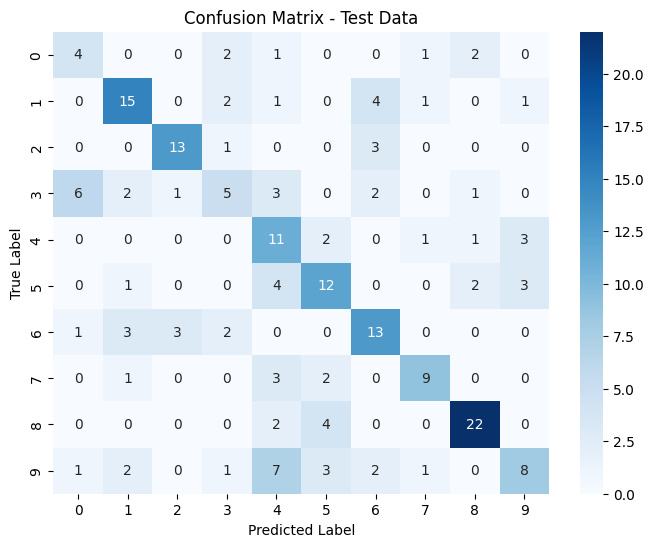

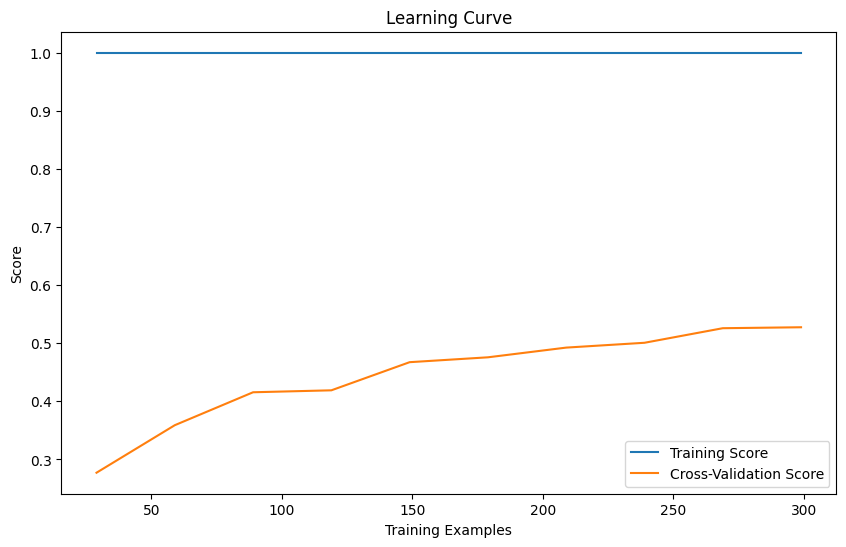

In [ ]:
# plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes, title='Confusion Matrix', cmap=plt.cm.Blues):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# plot Confusion Matrix
plot_confusion_matrix(labels_test, test_predictions, classes=np.unique(labels_test), title='Confusion Matrix - Test Data')

# learning Curve
train_sizes, train_scores, test_scores = learning_curve(model, features_train, labels_train, scoring='accuracy', cv=2, train_sizes=np.linspace(0.1, 1.0, 10))
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Cross-Validation Score')
plt.title('Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.legend()
plt.show()


## Neural network build, compile, and fit

In [ ]:
from tensorflow import keras
import tensorflow as tf

In [ ]:
# data shape
data_shape = features_train[0].shape

# seed
tf.random.set_seed(42)

# build model
nn_model = keras.models.Sequential()
nn_model.add(keras.layers.Dense(units=18, activation='relu', input_dim=data_shape[0]))
nn_model.add(keras.layers.Dense(units=60, activation='relu'))
nn_model.add(keras.layers.Dense(units=10, activation='softmax'))

In [ ]:
# compile and fit model
nn_model.compile(loss=keras.losses.SparseCategoricalCrossentropy(), optimizer=keras.optimizers.RMSprop(learning_rate=0.01), metrics='accuracy')

In [ ]:
# define patience
patience = int(len(features_train) * 0.04)

# early stop callback
callbacks = keras.callbacks.EarlyStopping(monitor='loss', patience=patience)

# fitting the model
nn_model.fit(features_train,labels_train,
          validation_data=(features_val, labels_val), callbacks=callbacks,  epochs=20)

Epoch 1/20
19/19 [==============================] - 1s 15ms/step - loss: 231.3222 - accuracy: 0.1169 - val_loss: 5.8497 - val_accuracy: 0.2362
Epoch 2/20
19/19 [==============================] - 0s 5ms/step - loss: 4.0649 - accuracy: 0.1386 - val_loss: 3.6965 - val_accuracy: 0.0905
Epoch 3/20
19/19 [==============================] - 0s 5ms/step - loss: 2.4450 - accuracy: 0.1336 - val_loss: 3.0009 - val_accuracy: 0.1005
Epoch 4/20
19/19 [==============================] - 0s 7ms/step - loss: 2.2945 - accuracy: 0.1302 - val_loss: 2.7967 - val_accuracy: 0.0854
Epoch 5/20
19/19 [==============================] - 0s 7ms/step - loss: 2.4276 - accuracy: 0.1219 - val_loss: 2.7020 - val_accuracy: 0.0854
Epoch 6/20
19/19 [==============================] - 0s 8ms/step - loss: 2.2705 - accuracy: 0.1219 - val_loss: 2.7065 - val_accuracy: 0.0603
Epoch 7/20
19/19 [==============================] - 0s 6ms/step - loss: 2.2700 - accuracy: 0.1219 - val_loss: 2.7036 - val_accuracy: 0.0854
Epoch 8/20
19/19 

## Neural network model evalutaion

In [ ]:
# get model prediction
feature_pred = nn_model.predict(x=np.array(features_test))

# model accuracy
nn_accuracy_score = keras.metrics.Accuracy()

# check accuracy for all predictions
for idx in range(len(feature_pred)):
  # updating accuracy
  nn_accuracy_score.update_state(feature_pred[idx].argmax(), labels_test[idx])

# accuracy score
nn_accuracy_score = nn_accuracy_score.result().numpy()
print(f'nn accuracy score: {nn_accuracy_score * 100}%')

7/7 [==============================] - 0s 5ms/step
nn accuracy score: 8.955223858356476%
